<a href="https://colab.research.google.com/github/ANACERMIR/Capstone_Project_G13/blob/main/models/Yolo/Yolov8_hyptuning/Yolov8_hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

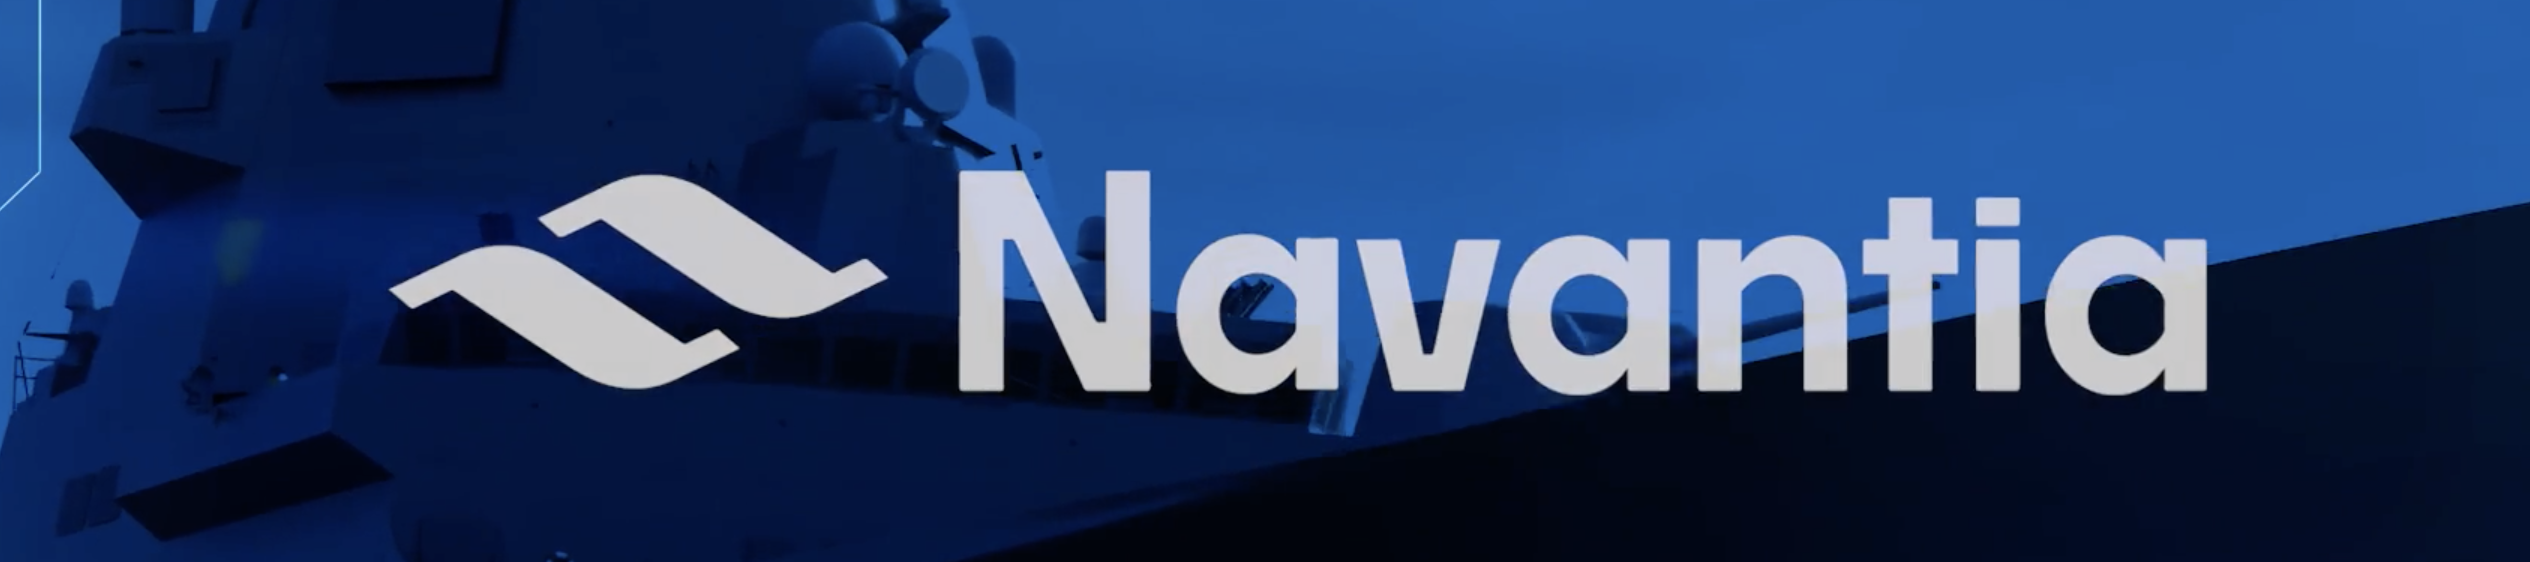

# **Yolo V8 Navantia Object Detection -- Hyperparameter tuning (gamma, image weights) -- Capstone Project**

## **Set Up**


In [1]:
!nvidia-smi

Mon Feb 27 17:25:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method 

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
#ClearML connection
!pip install clearml
#API connection 
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
%env CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.7/967.7 KB 21.8 MB/s eta 0:00:00
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
env: CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz


In [6]:
#ClearML
!pip install clearml
#API connection 
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
%env CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
env: CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz


## **Dataset V1 input**

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Ny3g4ZIR8JLlIGGc8uX6")
project = rf.workspace("capstone-project-ie").project("capstone-nv")
dataset = project.version(6).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Capstone-NV-6 in yolov8:: 100%|██████████| 6824/6824 [00:02<00:00, 2826.72it/s]


## **Model Training**

We did adjust the following parameters with the main objective of improving the model accuracy: 
* We ***increased the gamma value*** in the baseline Yolov8 model to 1 aiming to improve object detection performance. By increasing the gamma value, we are increasing the contrast of the image and as a result highlighting the differences in brightness between the object and its background, which makes it easier for the model to distinguish between the two. This enhancement is also relevant considering that most of the image composition that vessels will capture will be the background. 

* ***Image weights***- Activating this parameter help us with the distribution of the classes in the training data. It ensures that the model pays more attention to the classes that are under-represented (in our case the submarines and helicopters), which helps to reduce the risk of overfitting and improve the overall accuracy of the model. This could also happen in real life, vessels could be exposed to more cruises and tugboats. 

* Finally, we decreased the ***batch size to 14*** due to limitations of computational power.


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 name=yolov8_hyp imgsz=800 fl_gamma=1 image_weights=True batch=14

/content
100% 83.7M/83.7M [00:00<00:00, 306MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Capstone-NV-6/data.yaml, epochs=25, patience=50, batch=14, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=yolov8_hyp, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

The hyperparameters helped us to slightly improve the results of the model with an mAP of 93% and a recall of 89%.

##**Results Model v1**

/content


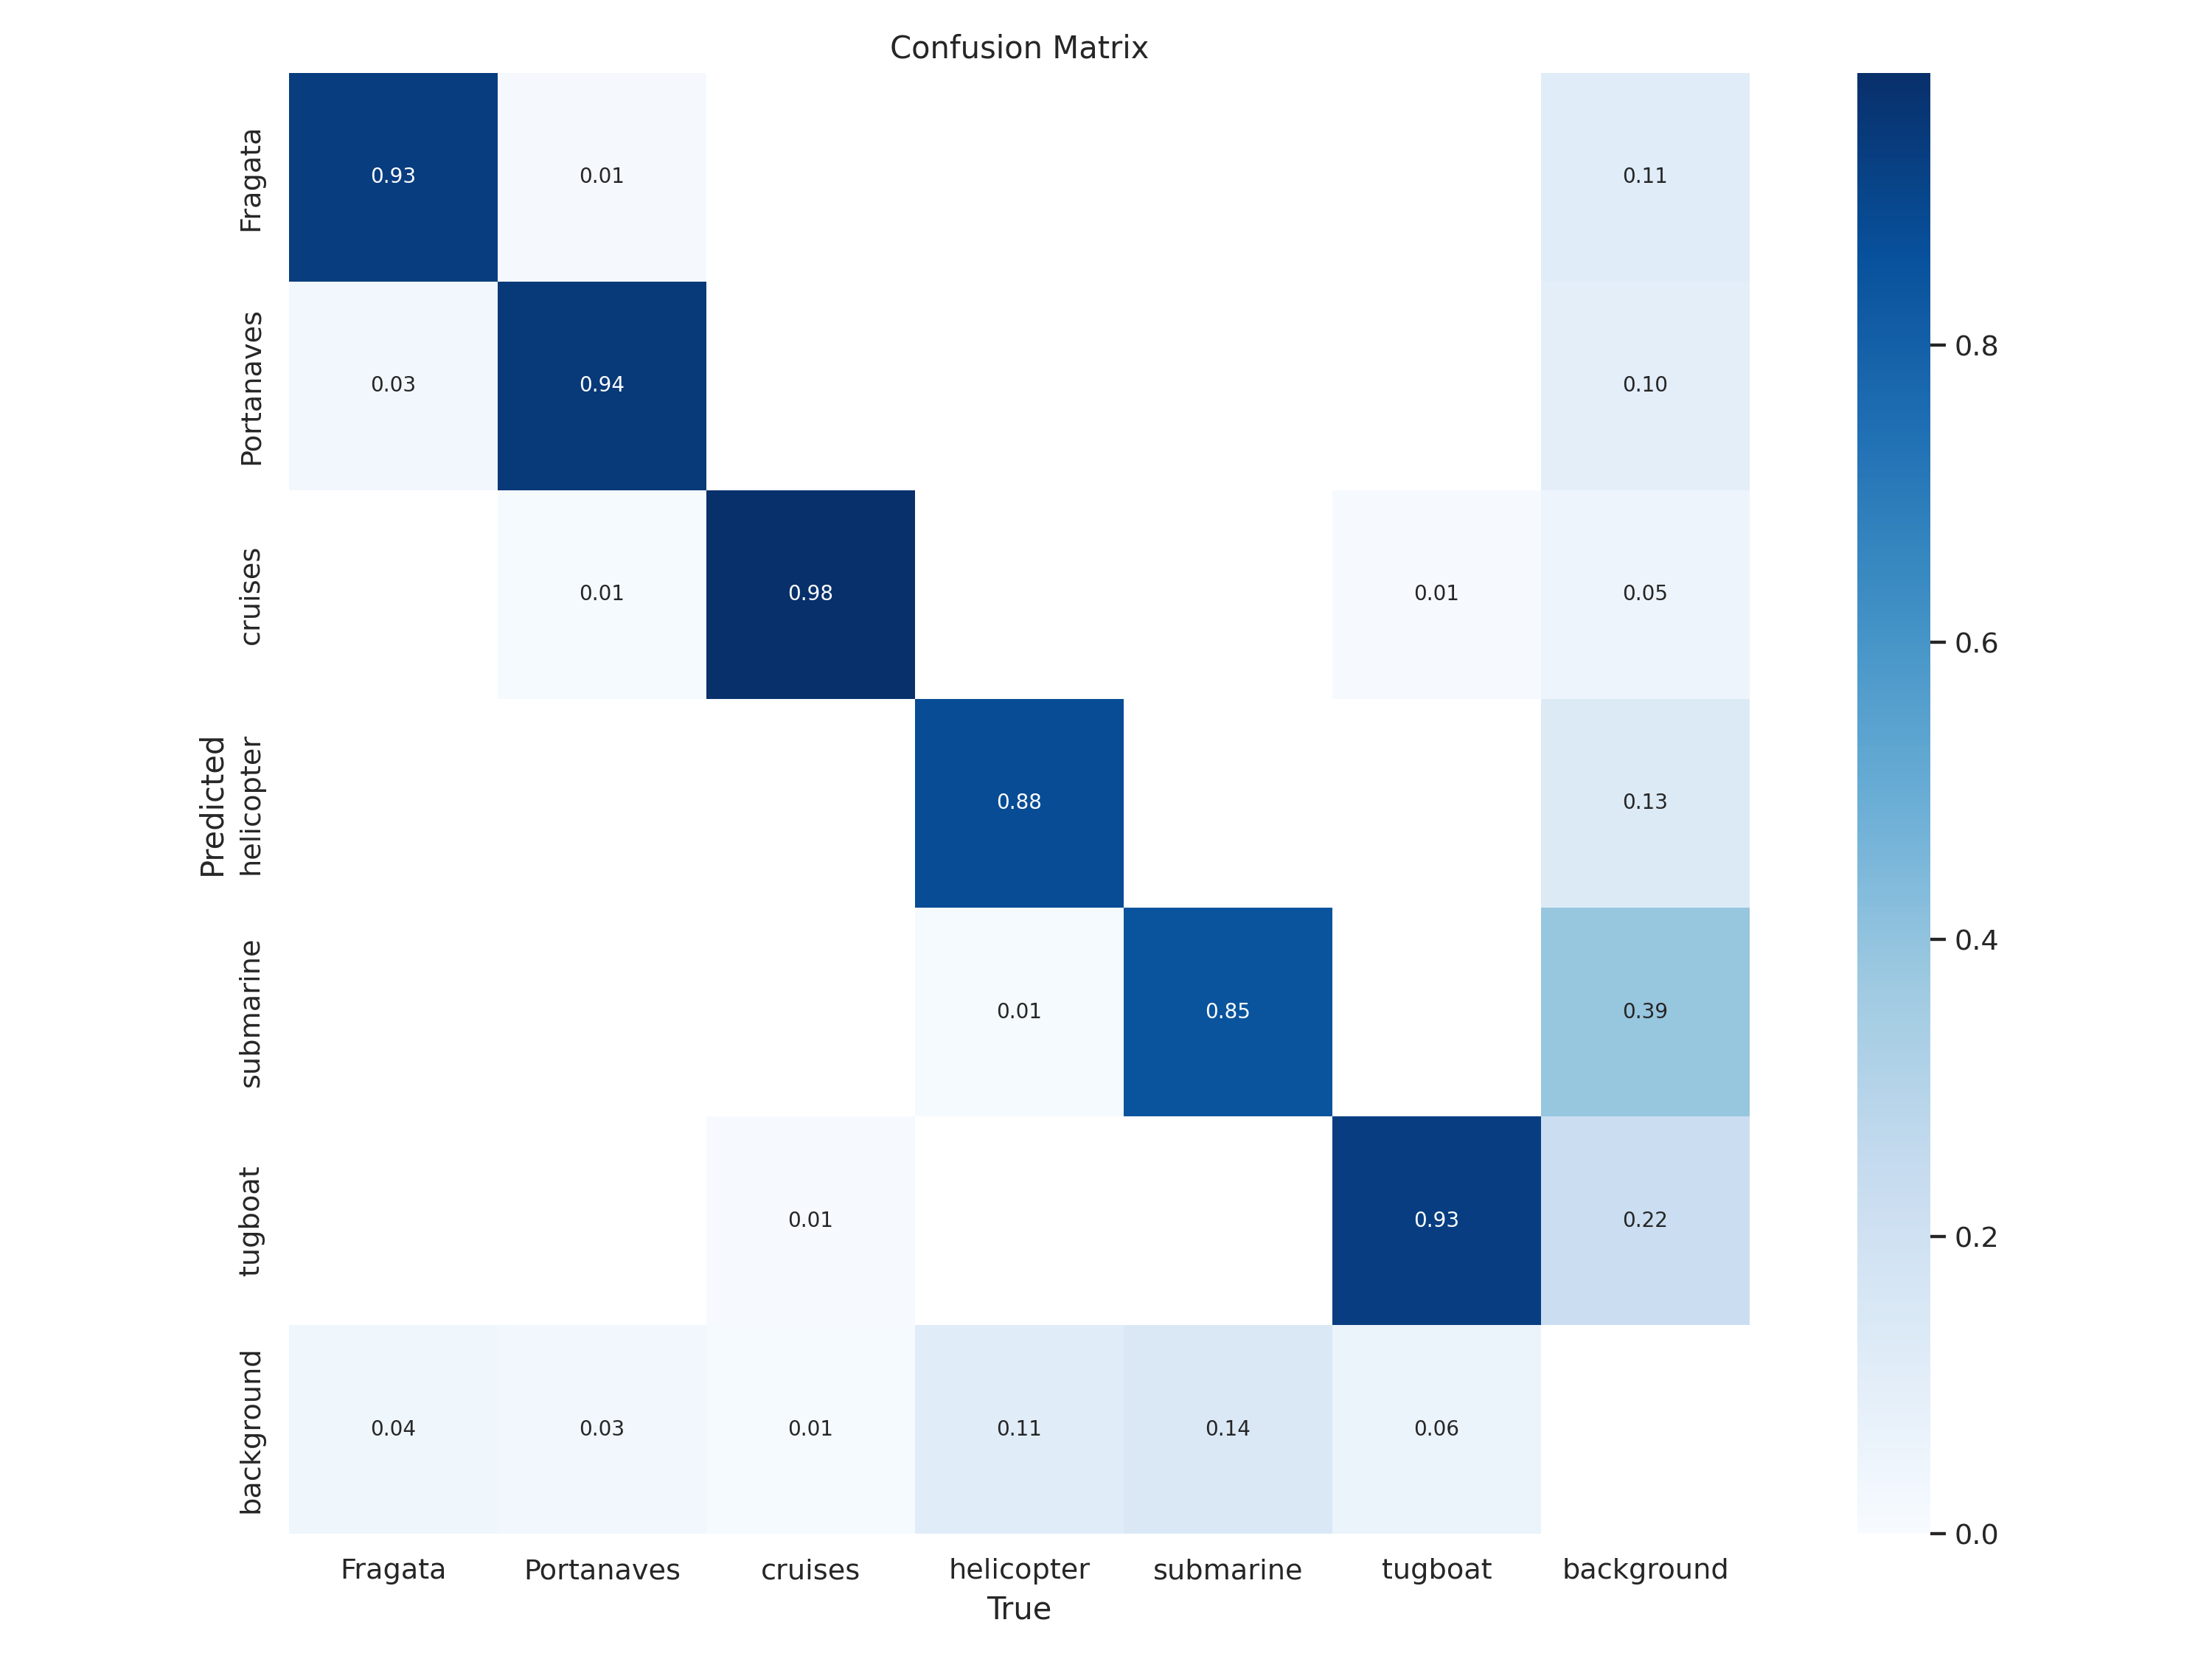

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_hyp/confusion_matrix.png', width=600)

/content


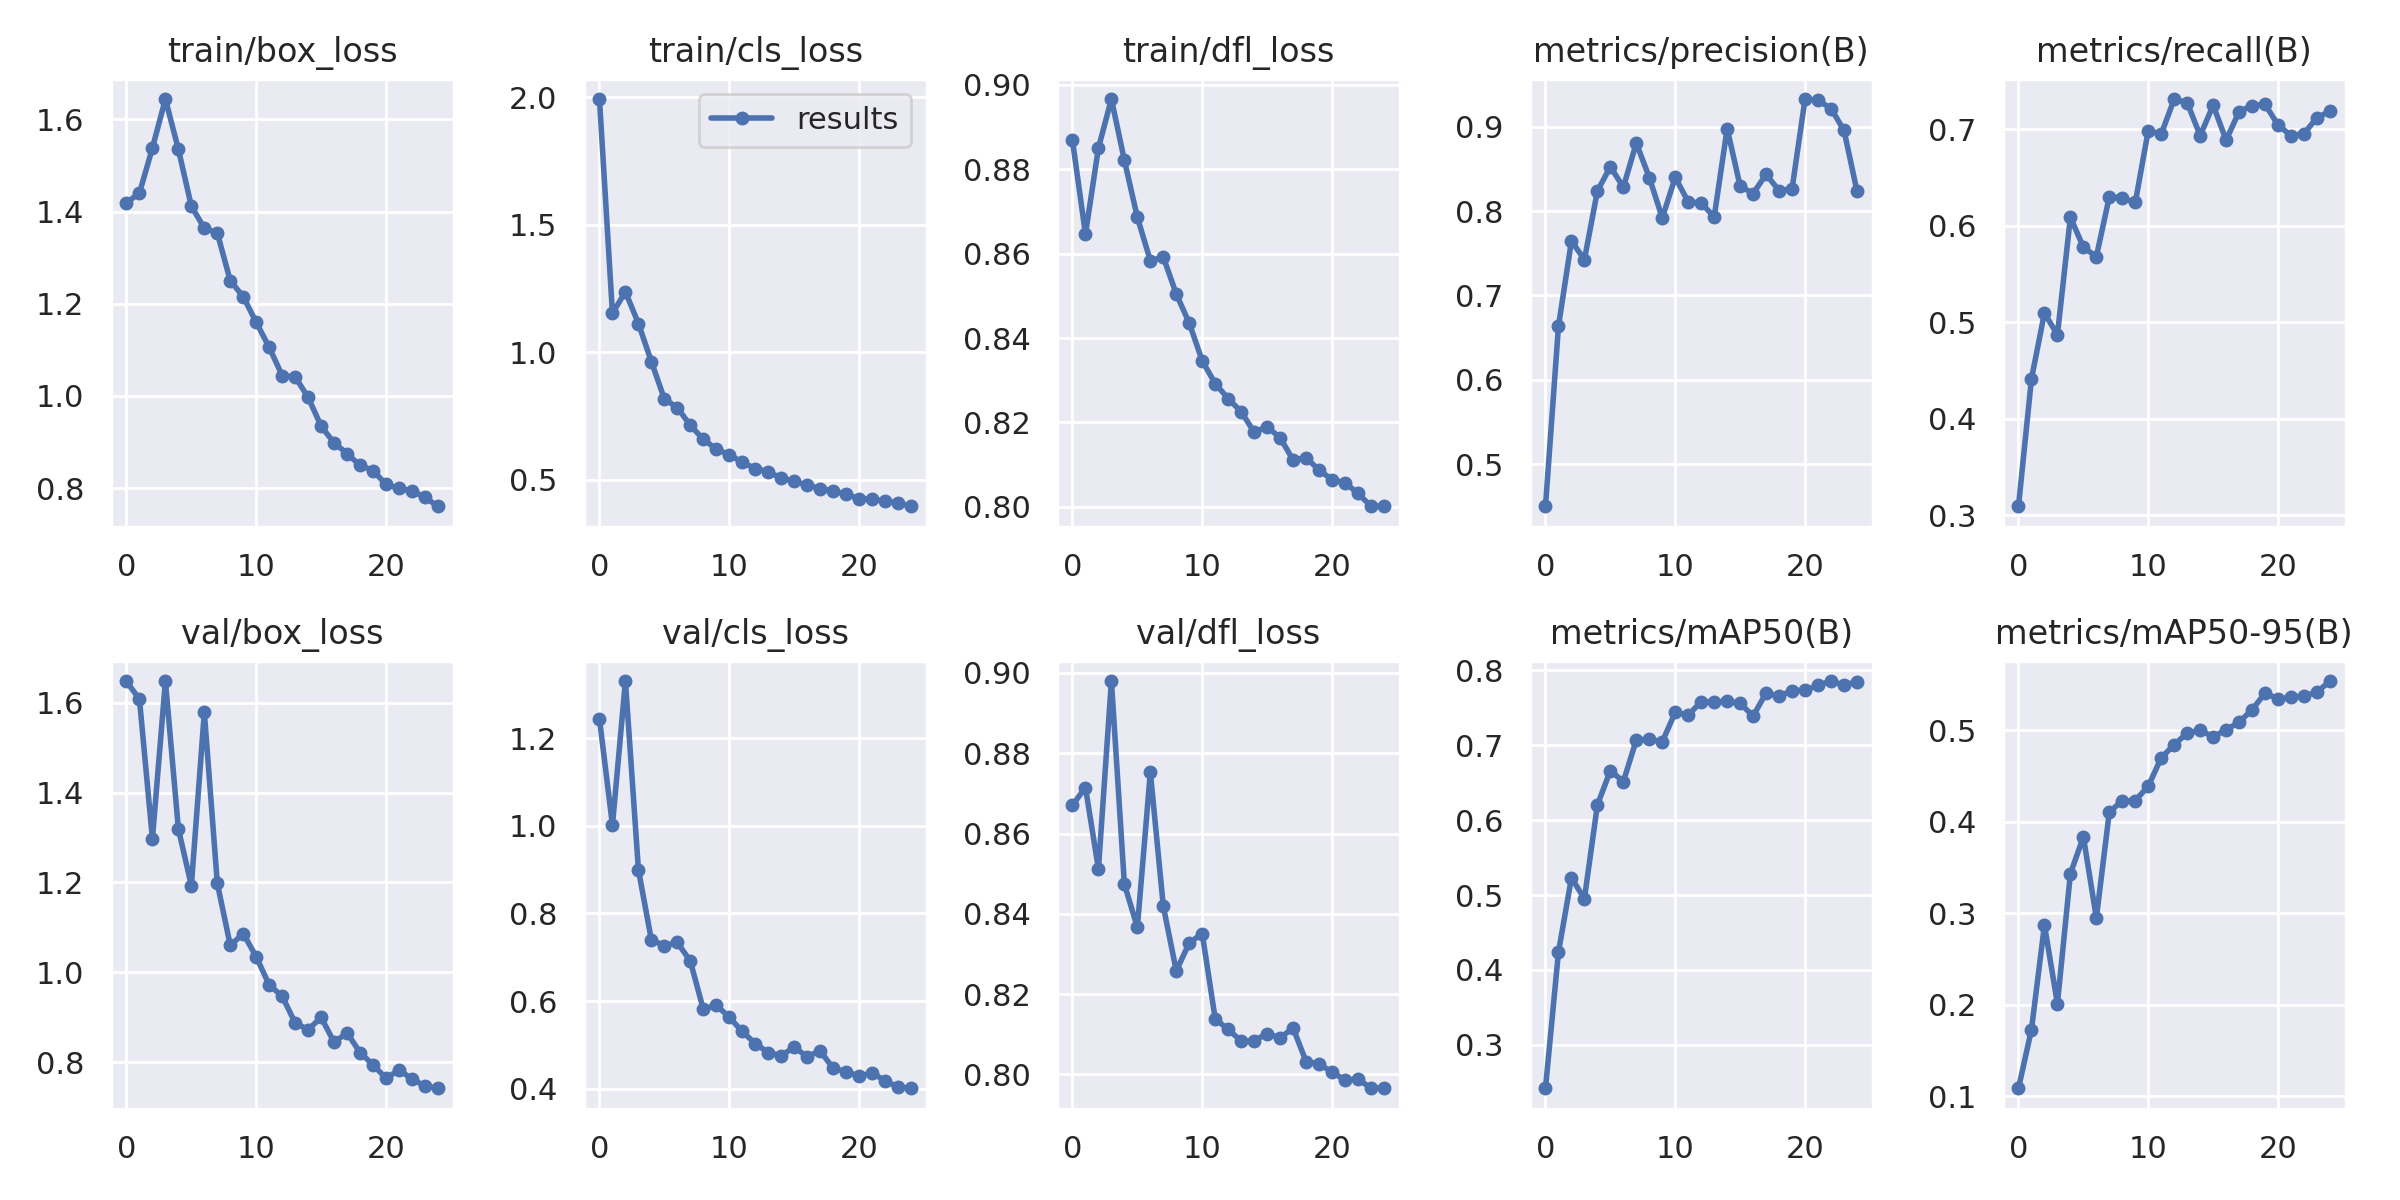

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_hyp/results.png', width=600)

/content


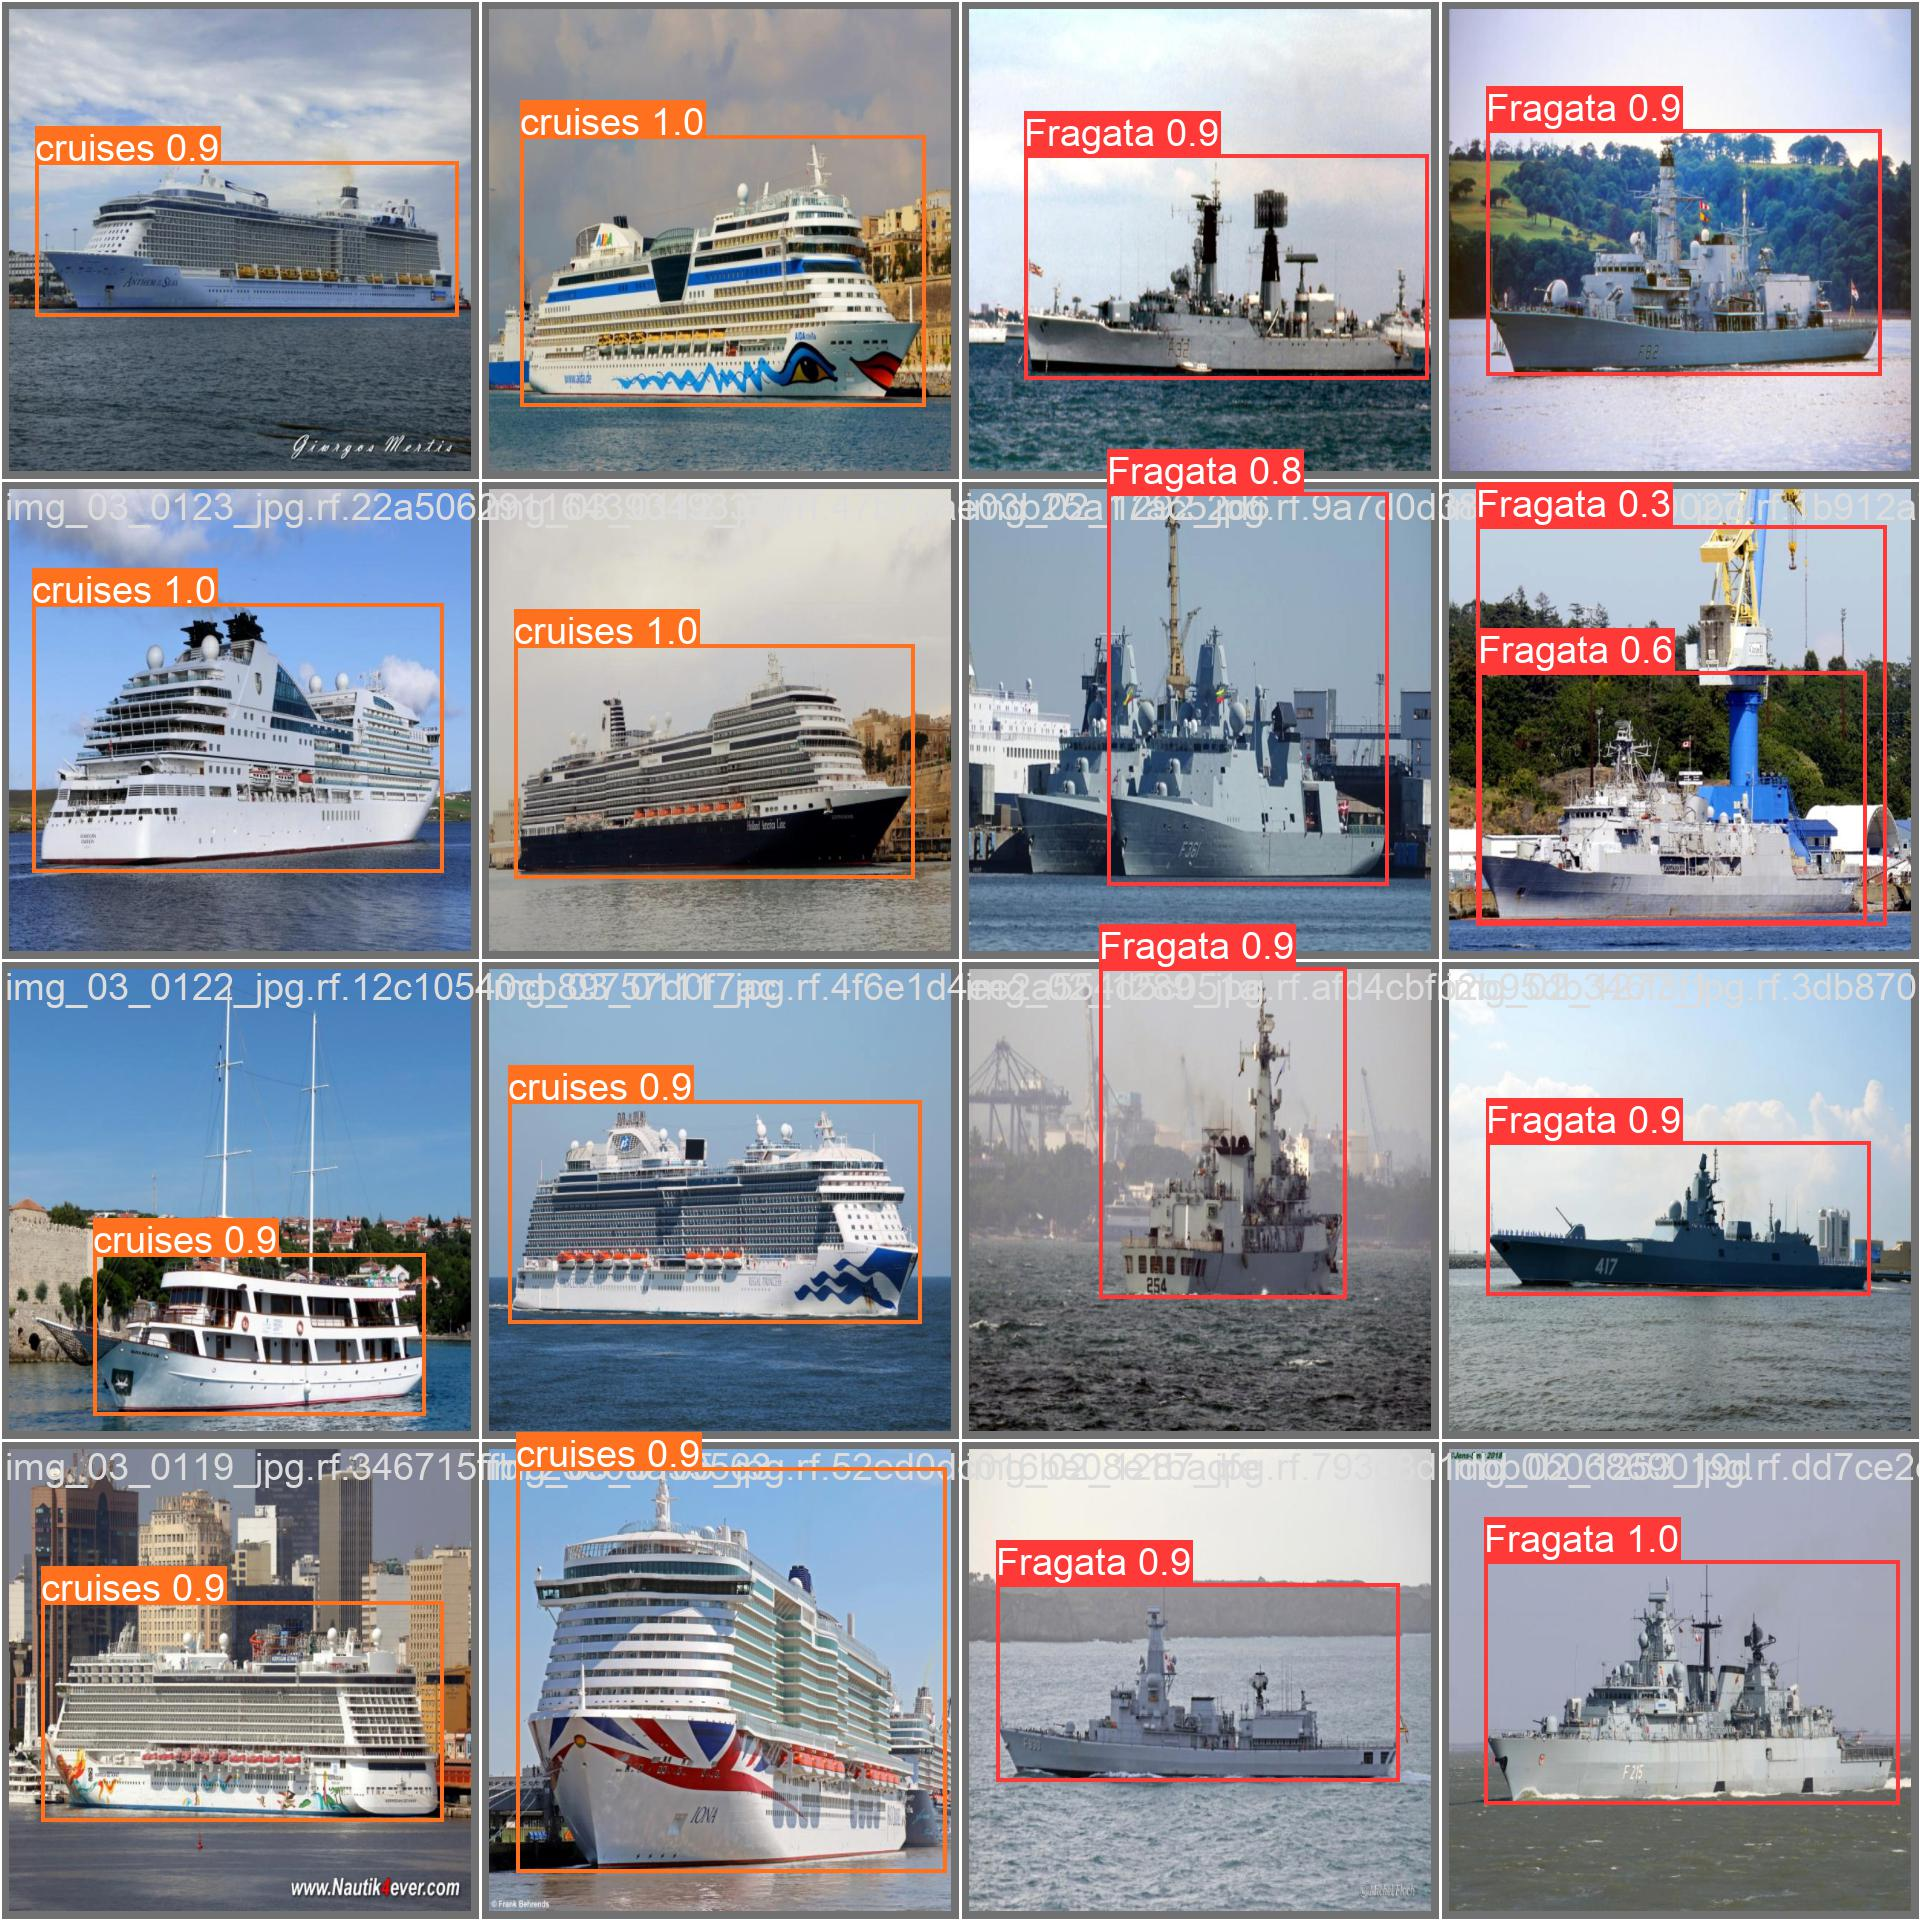

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_hyp/val_batch2_pred.jpg', width=600)

## **Model Validation**

The validation model results are similar to the training results. No improvement is reflected. 

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/yolov8_hyp/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Capstone-NV-6/valid/labels.cache... 1611 images, 0 backgrounds, 0 corrupt: 100% 1611/1611 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 101/101 [01:49<00:00,  1.09s/it]
                   all       1611       1687      0.924      0.884      0.929      0.697
               Fragata       1611        256      0.931      0.914      0.946      0.803
            Portanaves       1611        254      0.934      0.945      0.972      0.822
               cruises       1611        299      0.967      0.983      0.991      0.878
            helicopter       1611        231      0.933      0.835      0.887      0.553
             submarine       1611        342      0.874      0.728      0.826      0.432
               tugboa

## Inference with Model v1

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8_hyp/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
image 1/807 /content/datasets/Capstone-NV-6/test/images/00000013_jpg.rf.105c0deabe145c6222d99e4376dabe0d.jpg: 800x800 1 helicopter, 95.6ms
image 2/807 /content/datasets/Capstone-NV-6/test/images/00000030_jpg.rf.12c72571e1ad46f018beaa054b2e7b24.jpg: 800x800 1 helicopter, 61.0ms
image 3/807 /content/datasets/Capstone-NV-6/test/images/00000080_jpg.rf.bb7f701c1a632f4bef5b384a230ce8c5.jpg: 800x800 1 helicopter, 64.8ms
image 4/807 /content/datasets/Capstone-NV-6/test/images/00000088_jpg.rf.e7b5dcd357127aeb61fc762e56dcda70.jpg: 800x800 1 helicopter, 65.2ms
image 5/807 /content/datasets/Capstone-NV-6/test/images/00000094_png.rf.7d11aeeab7629296a13c8f6c12edbe7c.jpg: 800x800 1 helicopter, 64.4ms
image 6/807 /content/datasets/Capstone-NV-6/test/images/00000099_jpg.rf.73e6670c02a31b329a22de2bdea910ce.jpg: 800x800 1 helicop

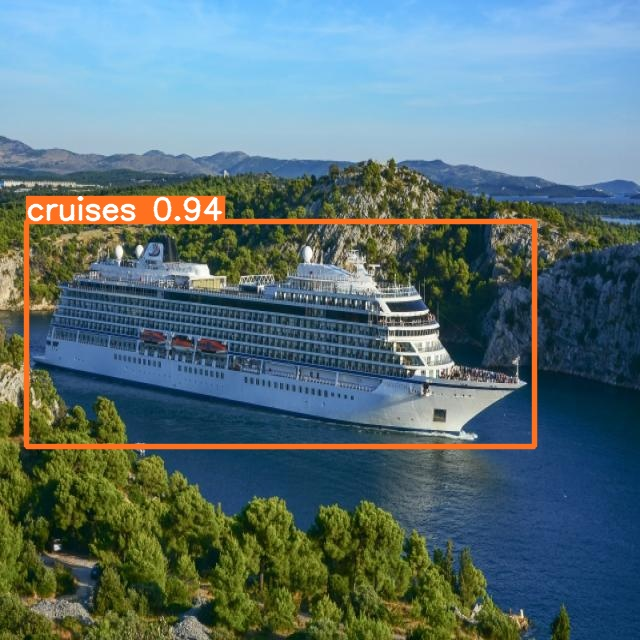

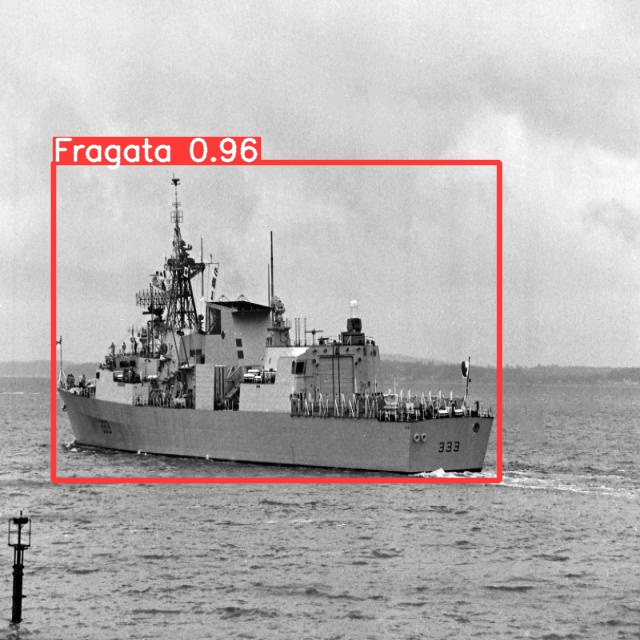

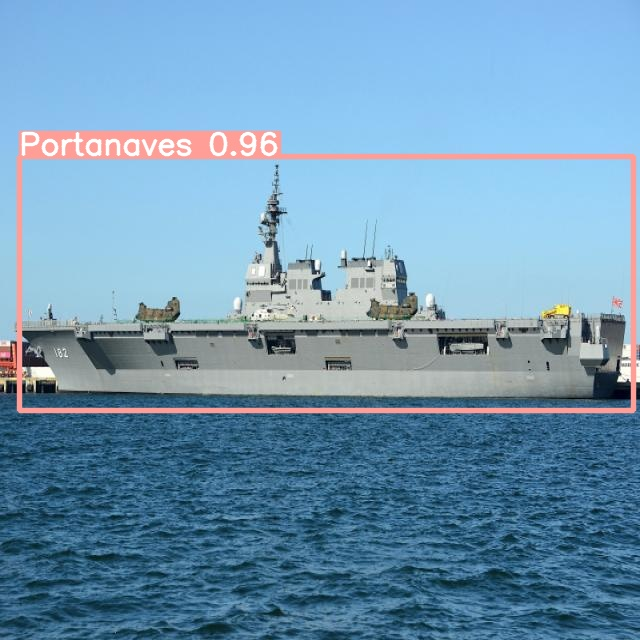

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# **Yolo V8 Navantia Object Detection -- Hyperparameter tuning (Optimizer)  -- Capstone Project**

## Model Training

***Adam optimizer***- Considering that we were dealing with a large dataset (≈ 20,000 of images), we decided to try this optimizer to speed up the training time, improve memory usage, and try to achieve better optimization and regularization.

***Weight Decay 0.005*** We modify the parameter to control the model complexity, reduce overfitting and improve the generalization performance of the model. It applies a penalty to the weights of the model, encouraging them to remain close to 0.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 name=yolov8_adamop imgsz=800 batch=14 optimizer=Adam weight_decay=0.0005 nbs=256

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Capstone-NV-6/data.yaml, epochs=25, patience=50, batch=14, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=yolov8_adamop, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

The adam optimizer give us worst results in terms of accuracy so we discard the model.

## **Results model v2**

/content


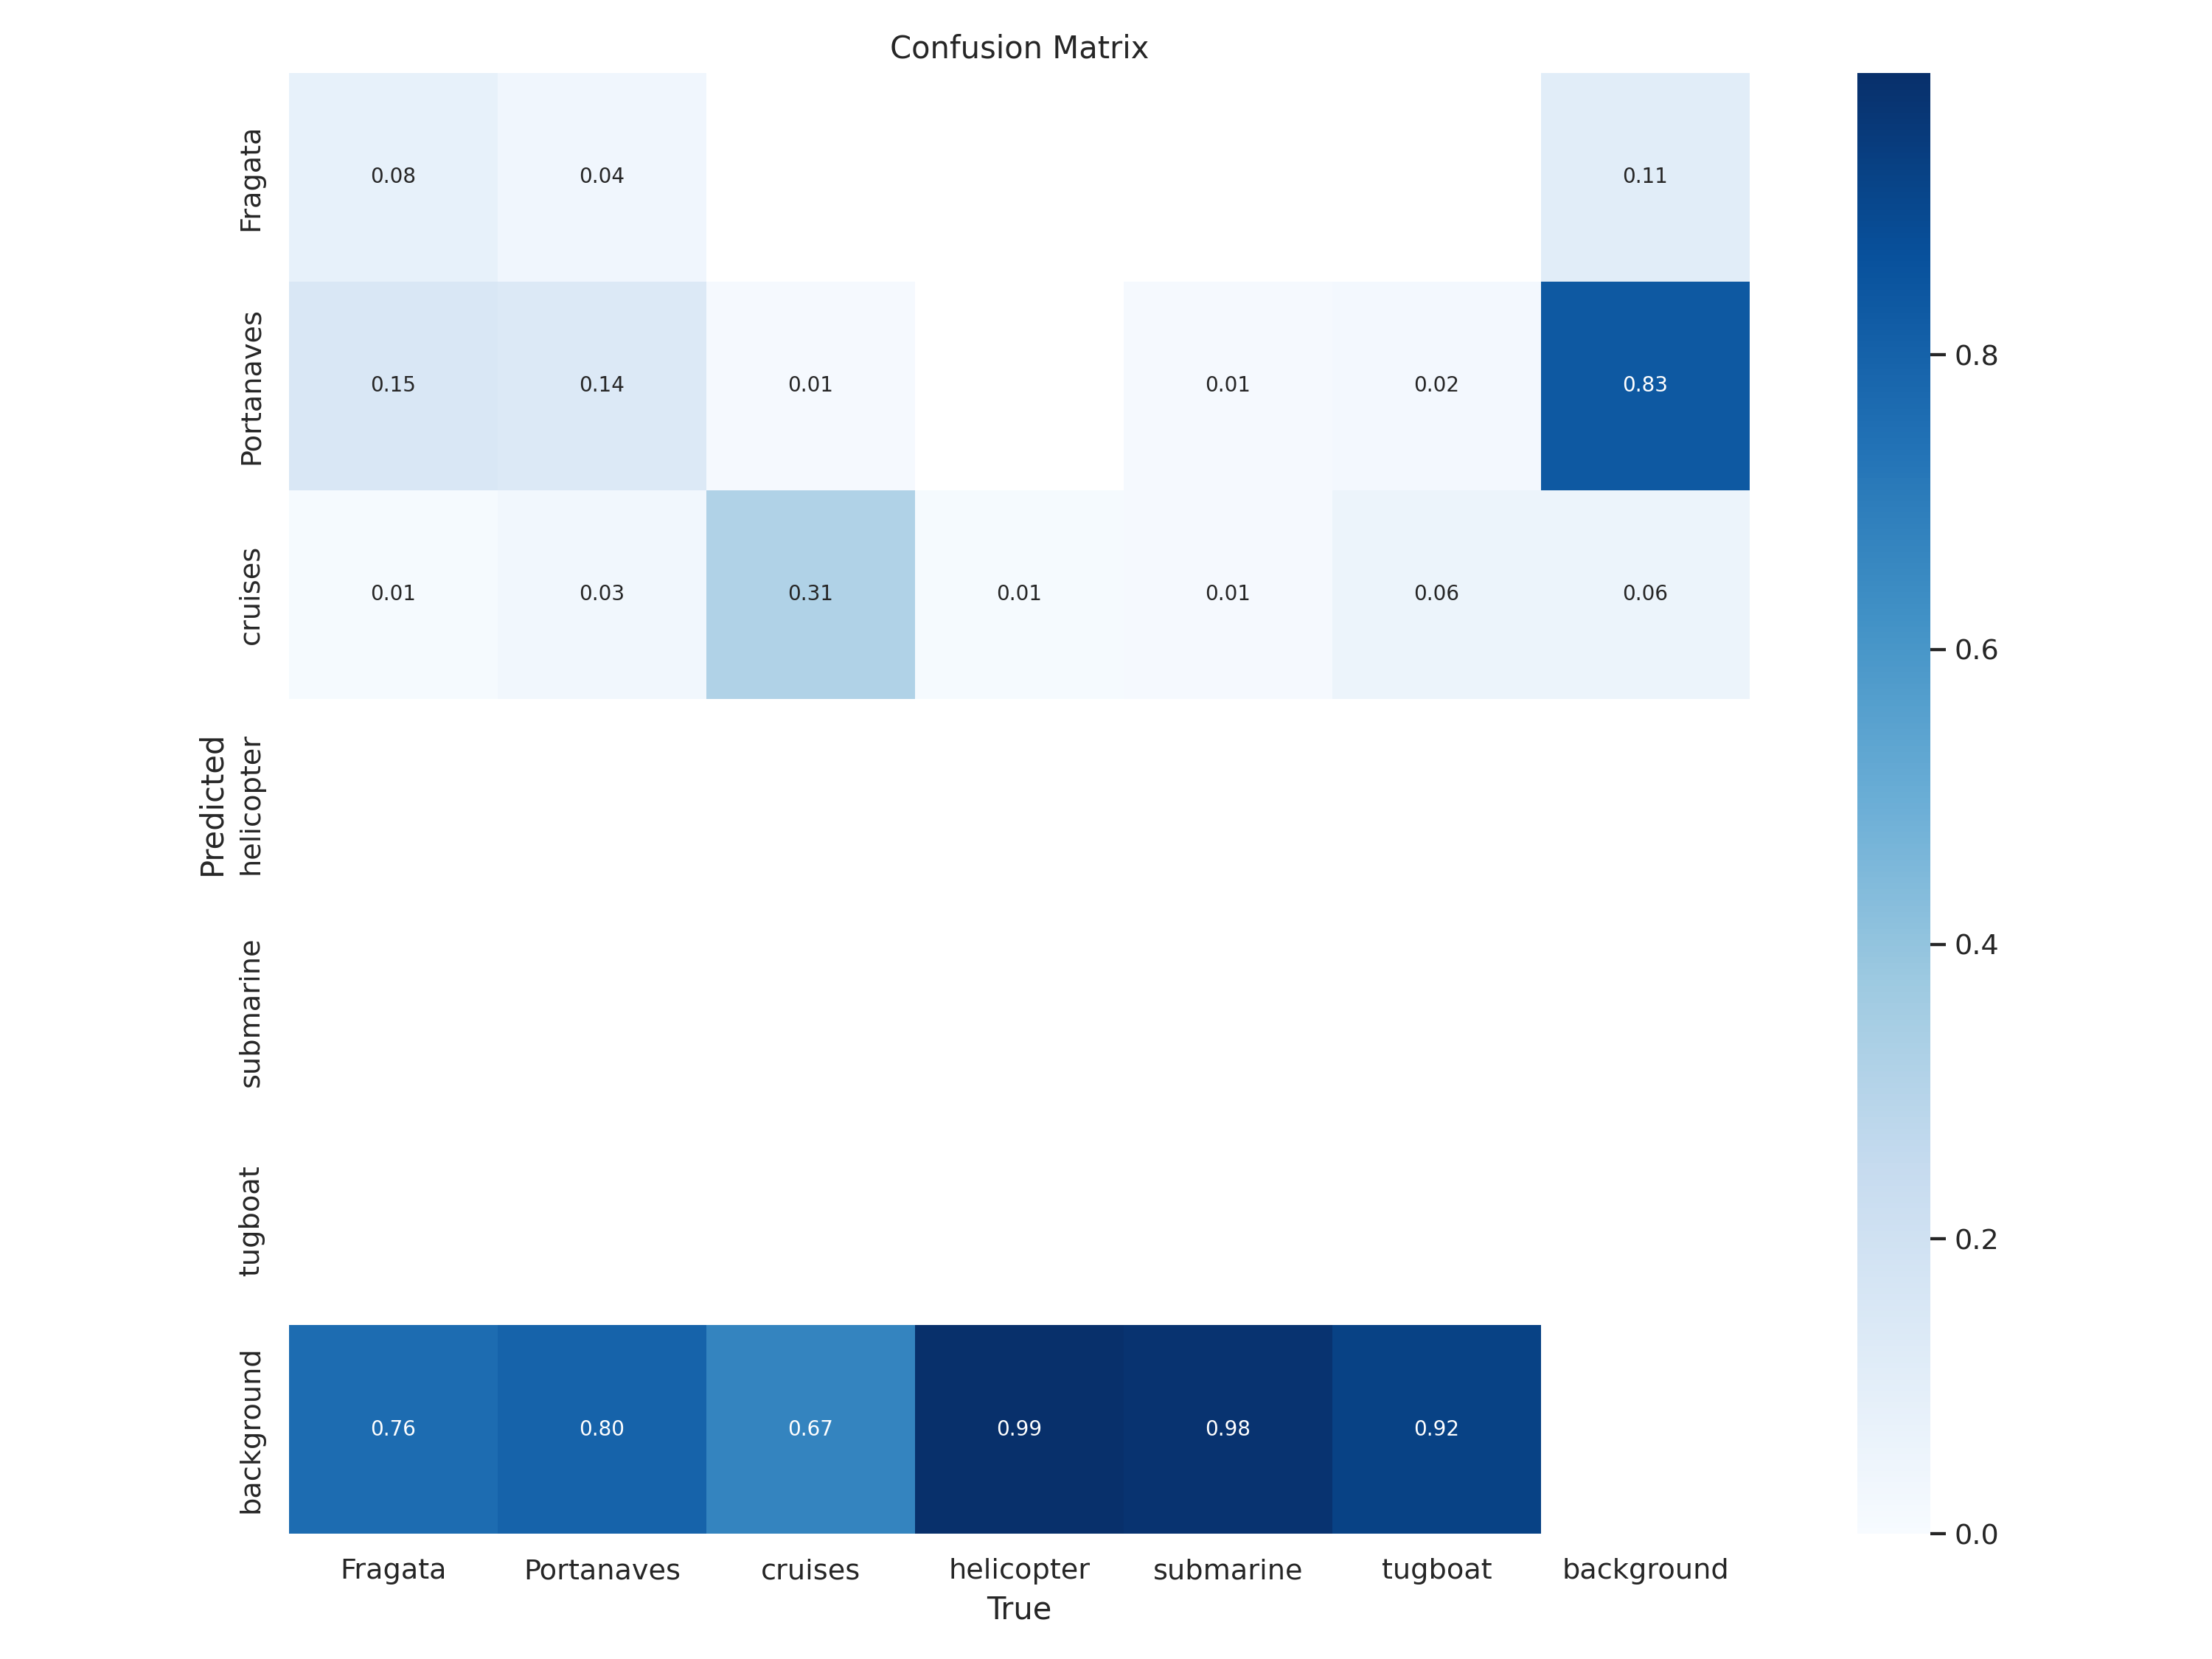

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_adamop/confusion_matrix.png', width=600)

/content


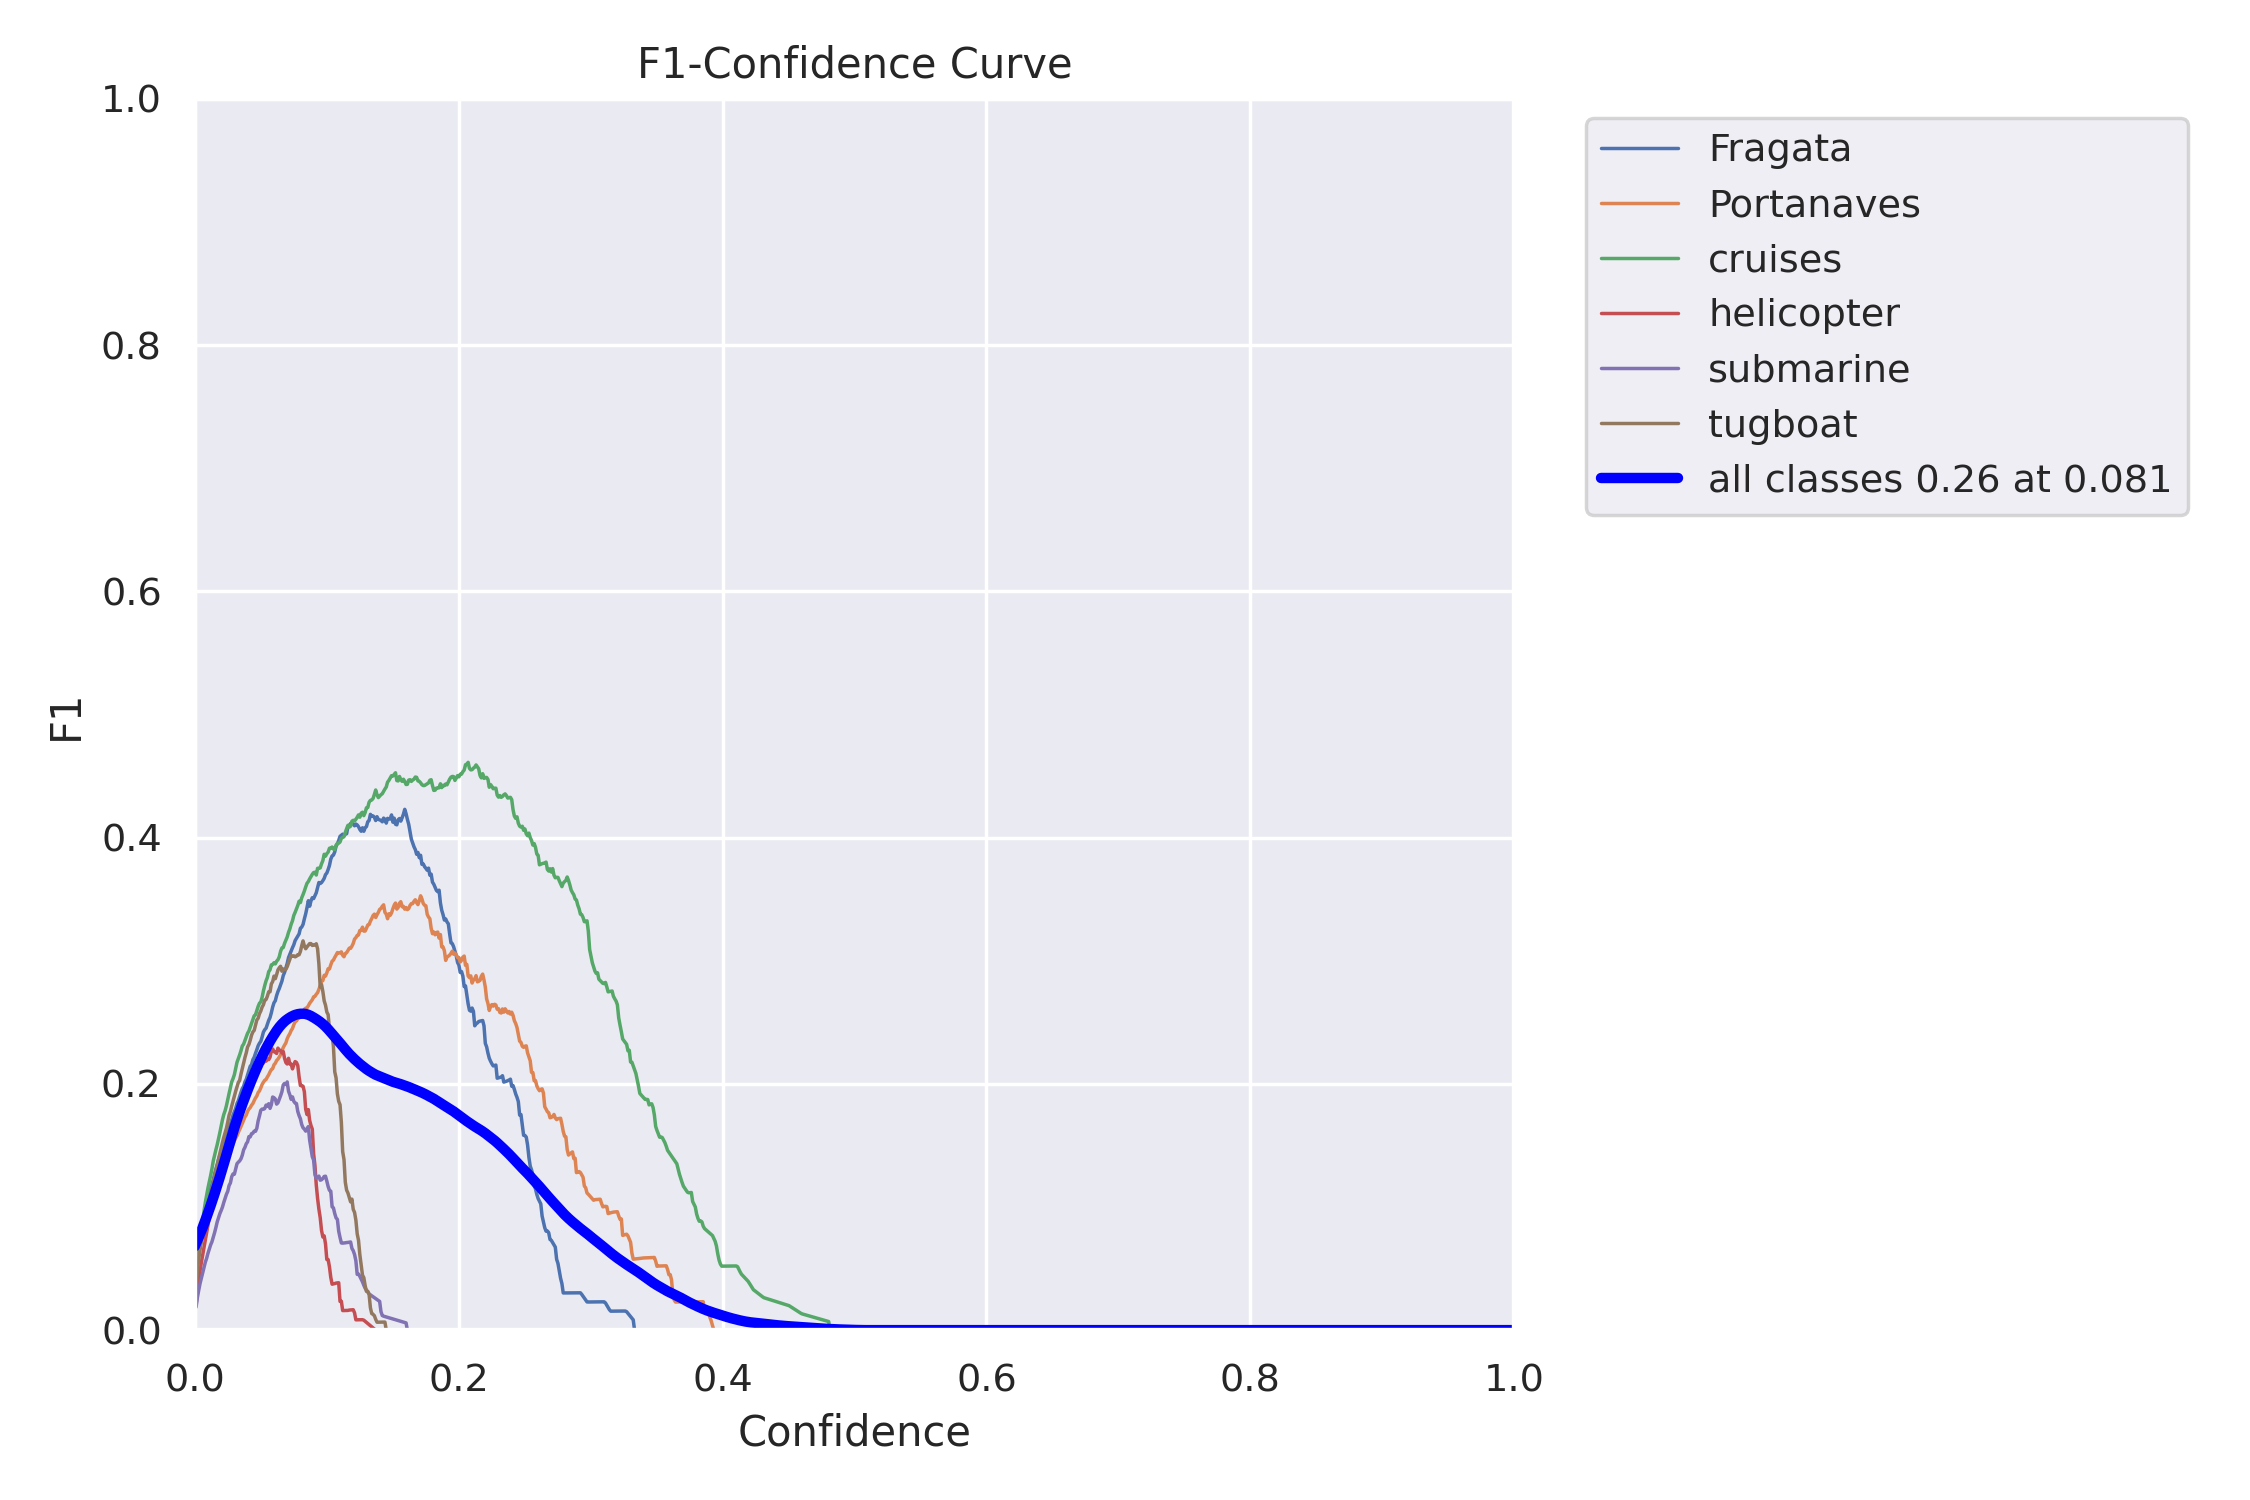

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_adamop/F1_curve.png', width=600)

/content


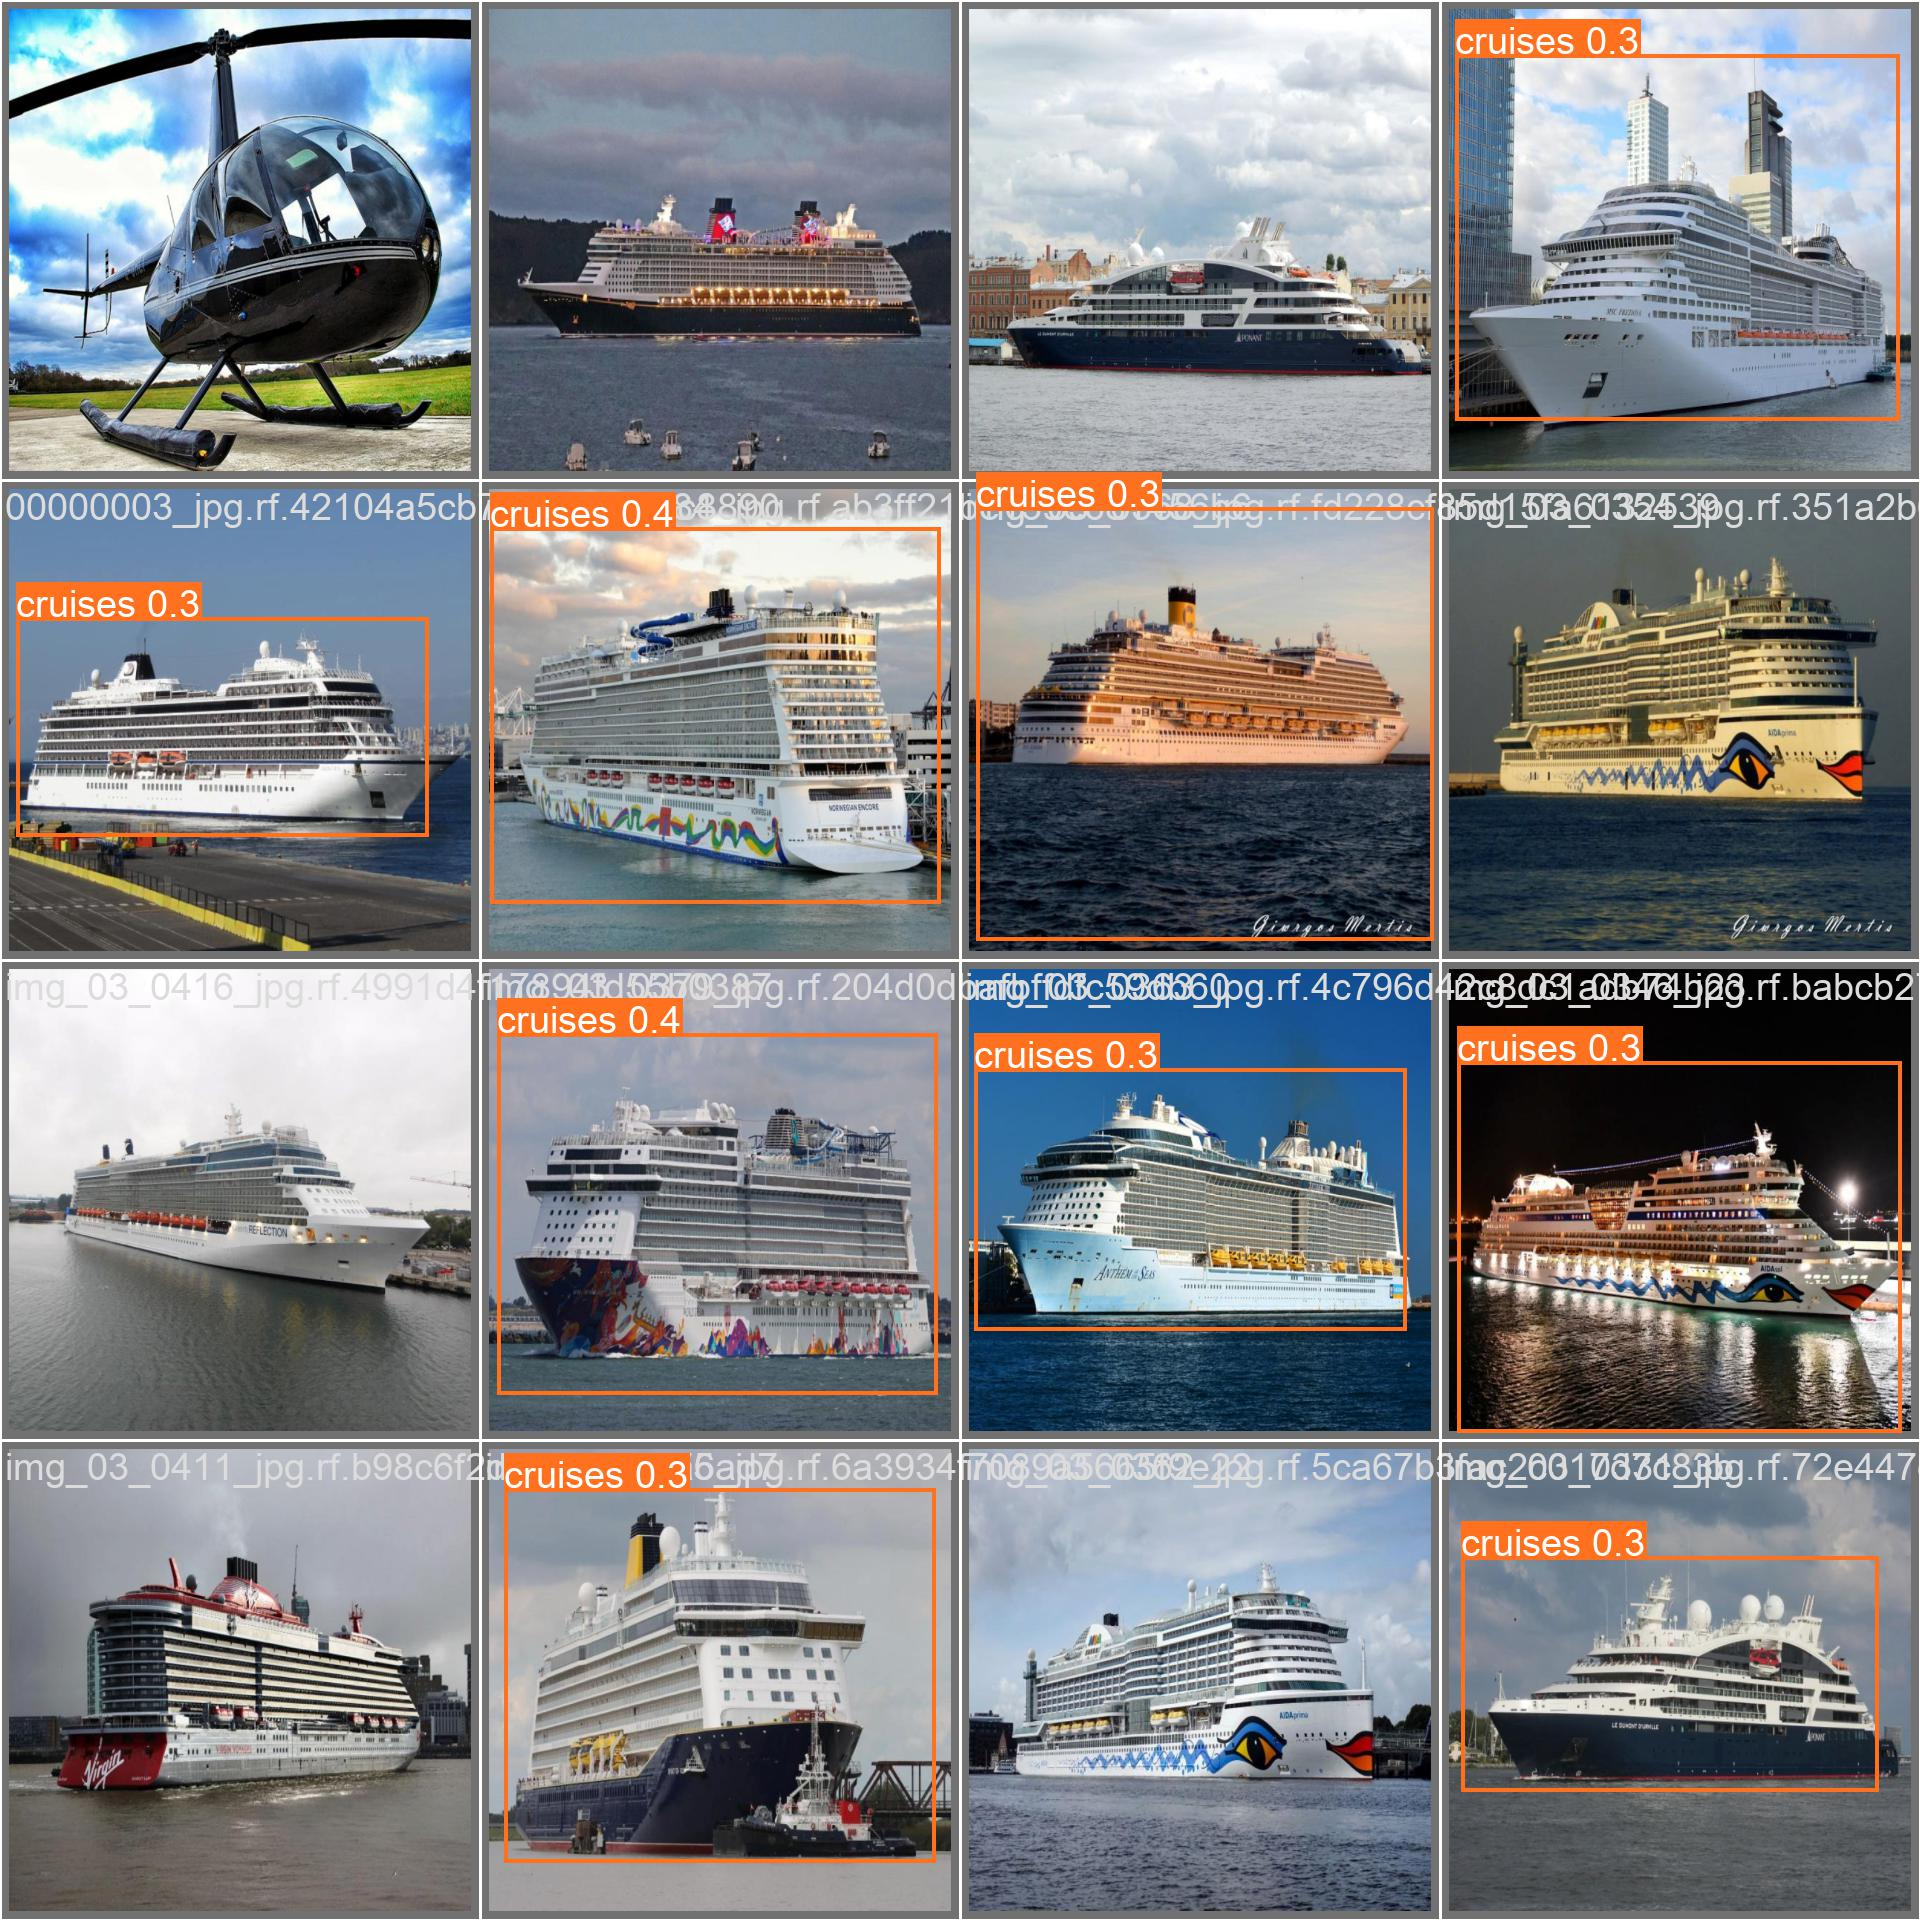

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/yolov8_adamop/val_batch0_pred.jpg', width=600)

## **Model Validation**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/yolov8_adamop/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Capstone-NV-6/valid/labels.cache... 1611 images, 0 backgrounds, 0 corrupt: 100% 1611/1611 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 101/101 [01:44<00:00,  1.04s/it]
                   all       1611       1687      0.242      0.462      0.257      0.122
               Fragata       1611        256      0.239      0.687      0.362      0.176
            Portanaves       1611        254      0.163      0.791      0.252       0.12
               cruises       1611        299      0.249      0.732      0.447      0.246
            helicopter       1611        231      0.223     0.0952      0.127     0.0544
             submarine       1611        342      0.316     0.0789      0.134     0.0439
               tugboa

## **Inference with model v2**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8_adamop/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
image 1/807 /content/datasets/Capstone-NV-6/test/images/00000013_jpg.rf.105c0deabe145c6222d99e4376dabe0d.jpg: 800x800 100.1ms
image 2/807 /content/datasets/Capstone-NV-6/test/images/00000030_jpg.rf.12c72571e1ad46f018beaa054b2e7b24.jpg: 800x800 1 cruises, 60.8ms
image 3/807 /content/datasets/Capstone-NV-6/test/images/00000080_jpg.rf.bb7f701c1a632f4bef5b384a230ce8c5.jpg: 800x800 58.3ms
image 4/807 /content/datasets/Capstone-NV-6/test/images/00000088_jpg.rf.e7b5dcd357127aeb61fc762e56dcda70.jpg: 800x800 66.1ms
image 5/807 /content/datasets/Capstone-NV-6/test/images/00000094_png.rf.7d11aeeab7629296a13c8f6c12edbe7c.jpg: 800x800 65.2ms
image 6/807 /content/datasets/Capstone-NV-6/test/images/00000099_jpg.rf.73e6670c02a31b329a22de2bdea910ce.jpg: 800x800 64.6ms
image 7/807 /content/datasets/Capstone-NV-6/test/images/0000

# **Yolo V8 Navantia Object Detection -- Hyperparameter tuning (Weight decay and gamma)  -- Capstone Project**

## **Model Training**

***Gamma 1.2*** After achieving good results with the first tune model we decided to keep increasing the gamma value as it helps is to highlight the differences in brightness between the object and its background. 

***Weight Decay 0.004*** We modify the parameter to control the model complexity, reduce overfitting and improve the generalization performance of the model. 

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True weight_decay=0.0004 fl_gamma=1.2 nbs=256

/content
100% 83.7M/83.7M [00:04<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Capstone-NV-6/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

We achieved to improved the results of the first version of our tune model. mAP is higher as well as precision an recall. And the inference time is slightly different.

## **Results Model v3**

/content


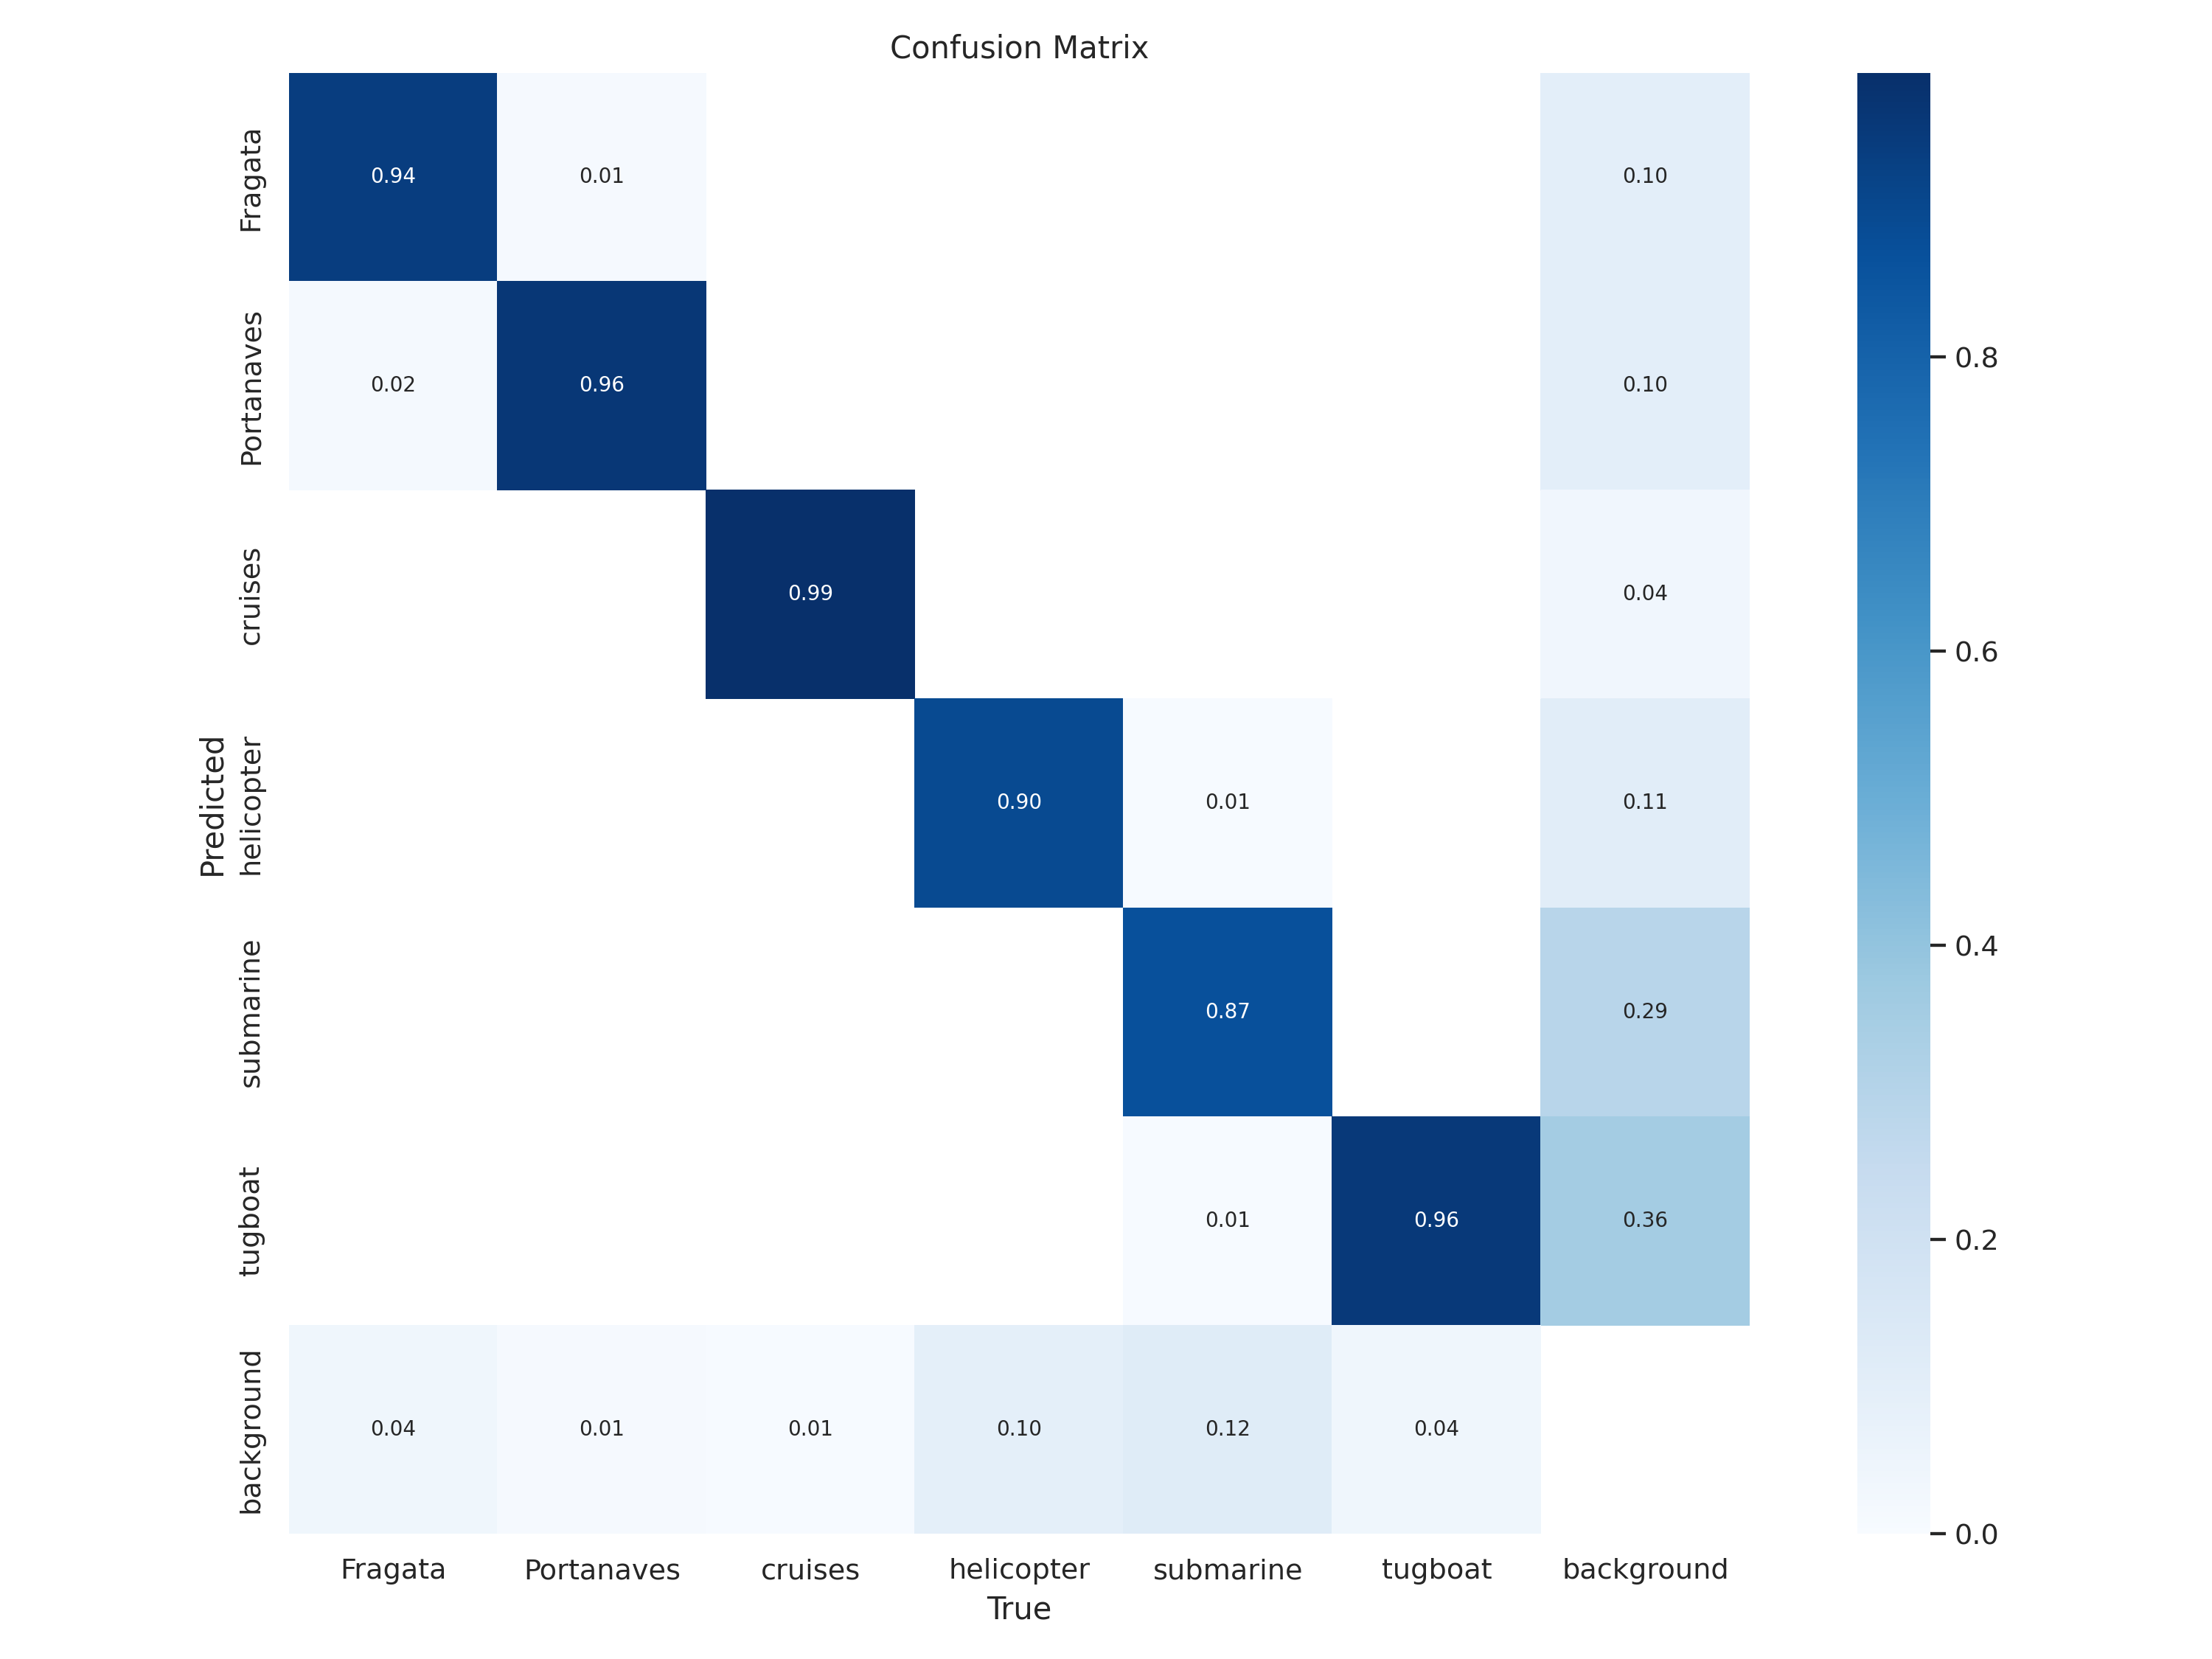

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


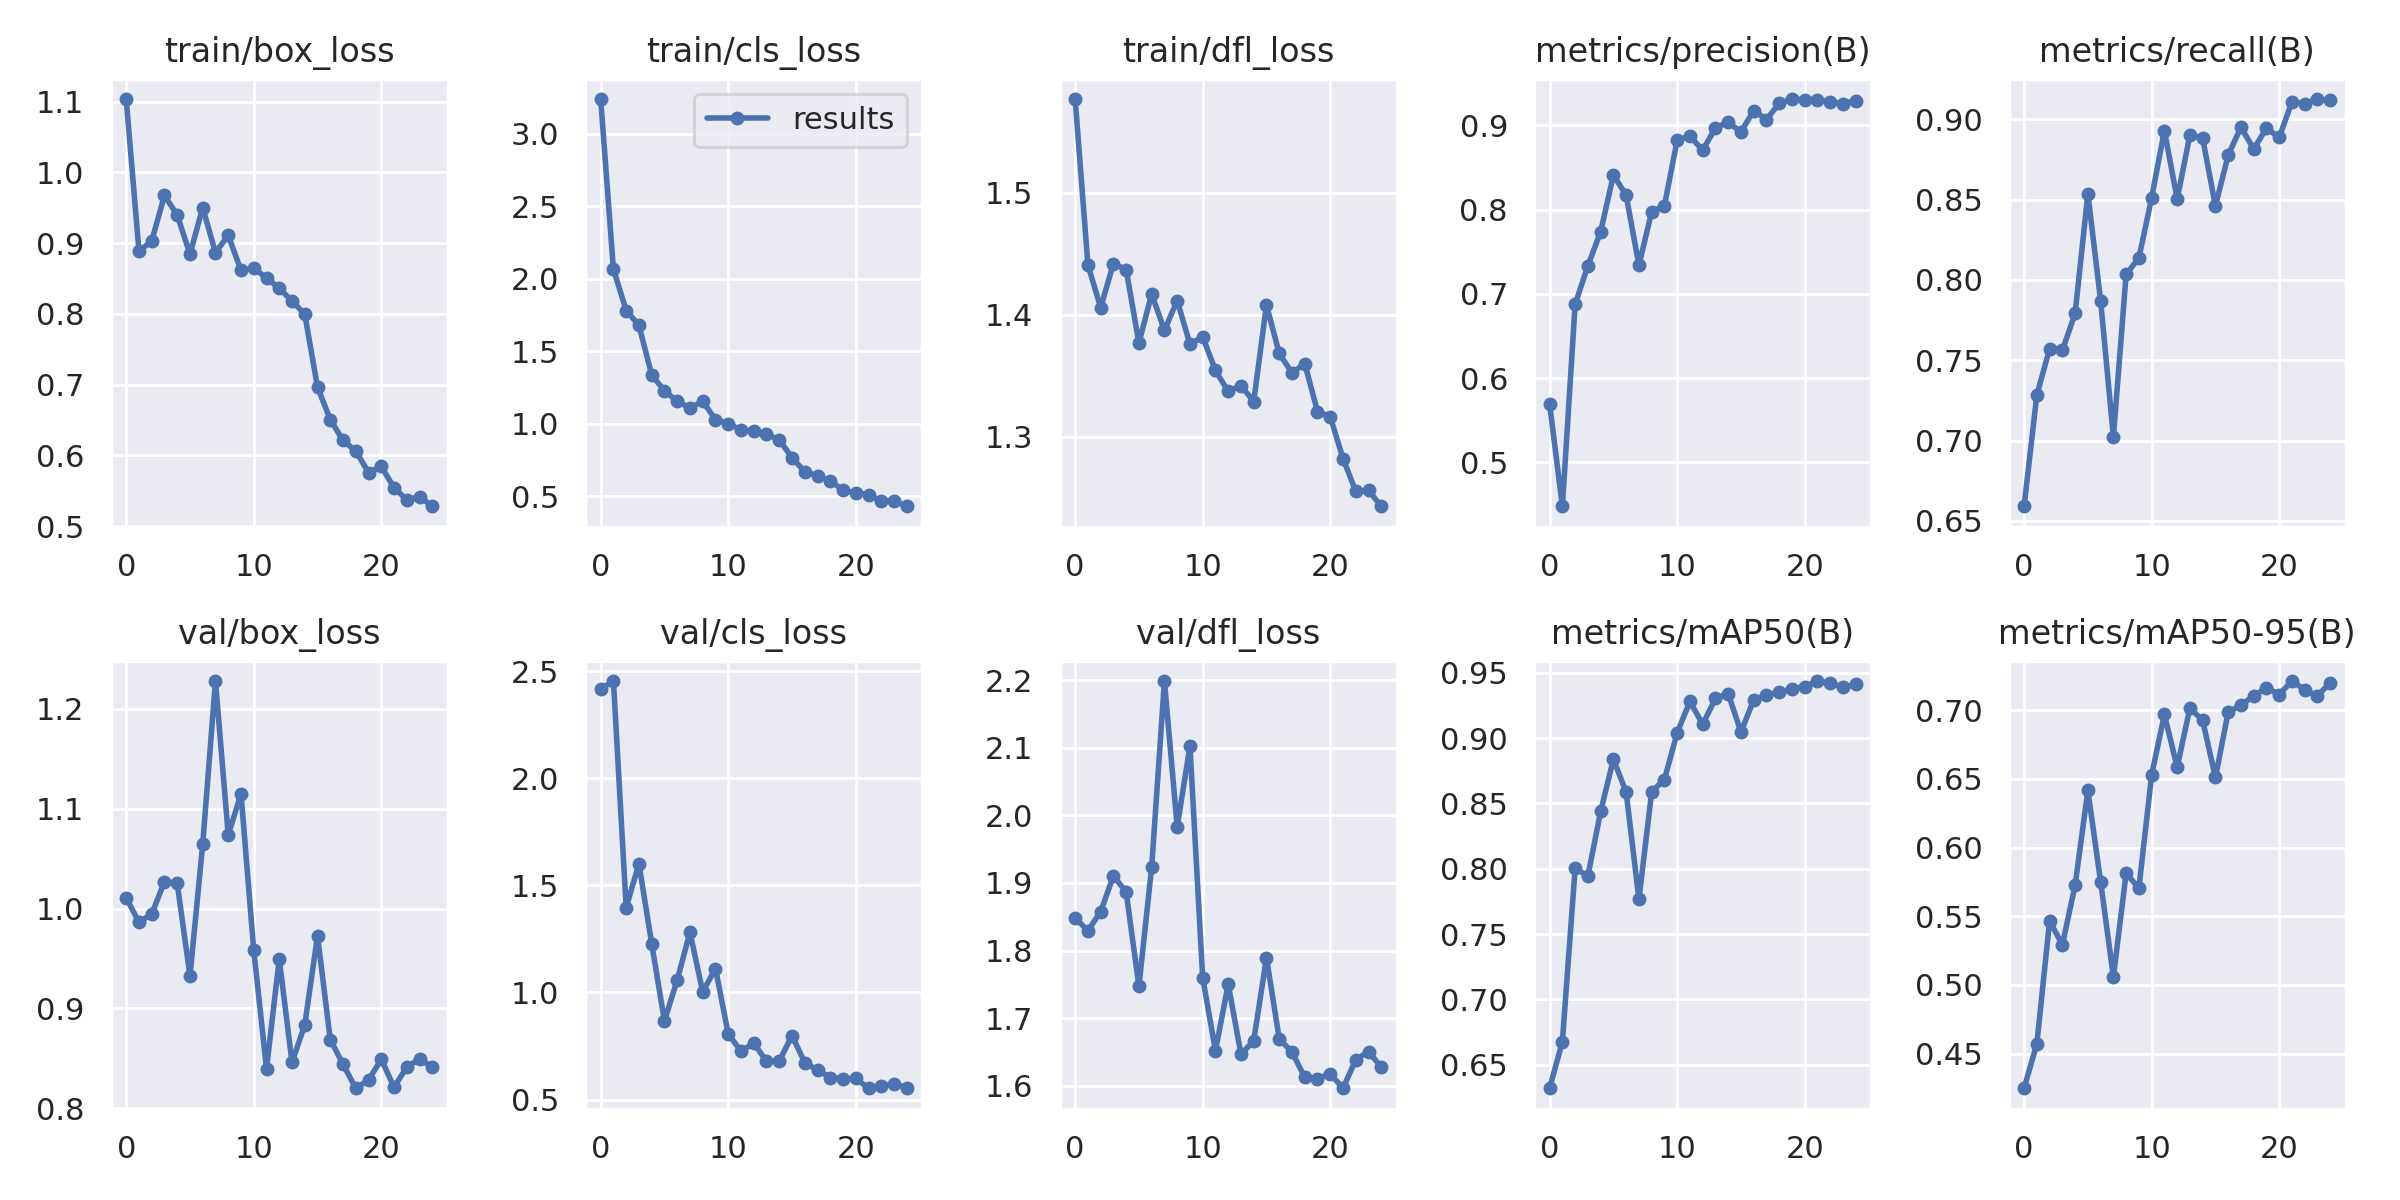

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


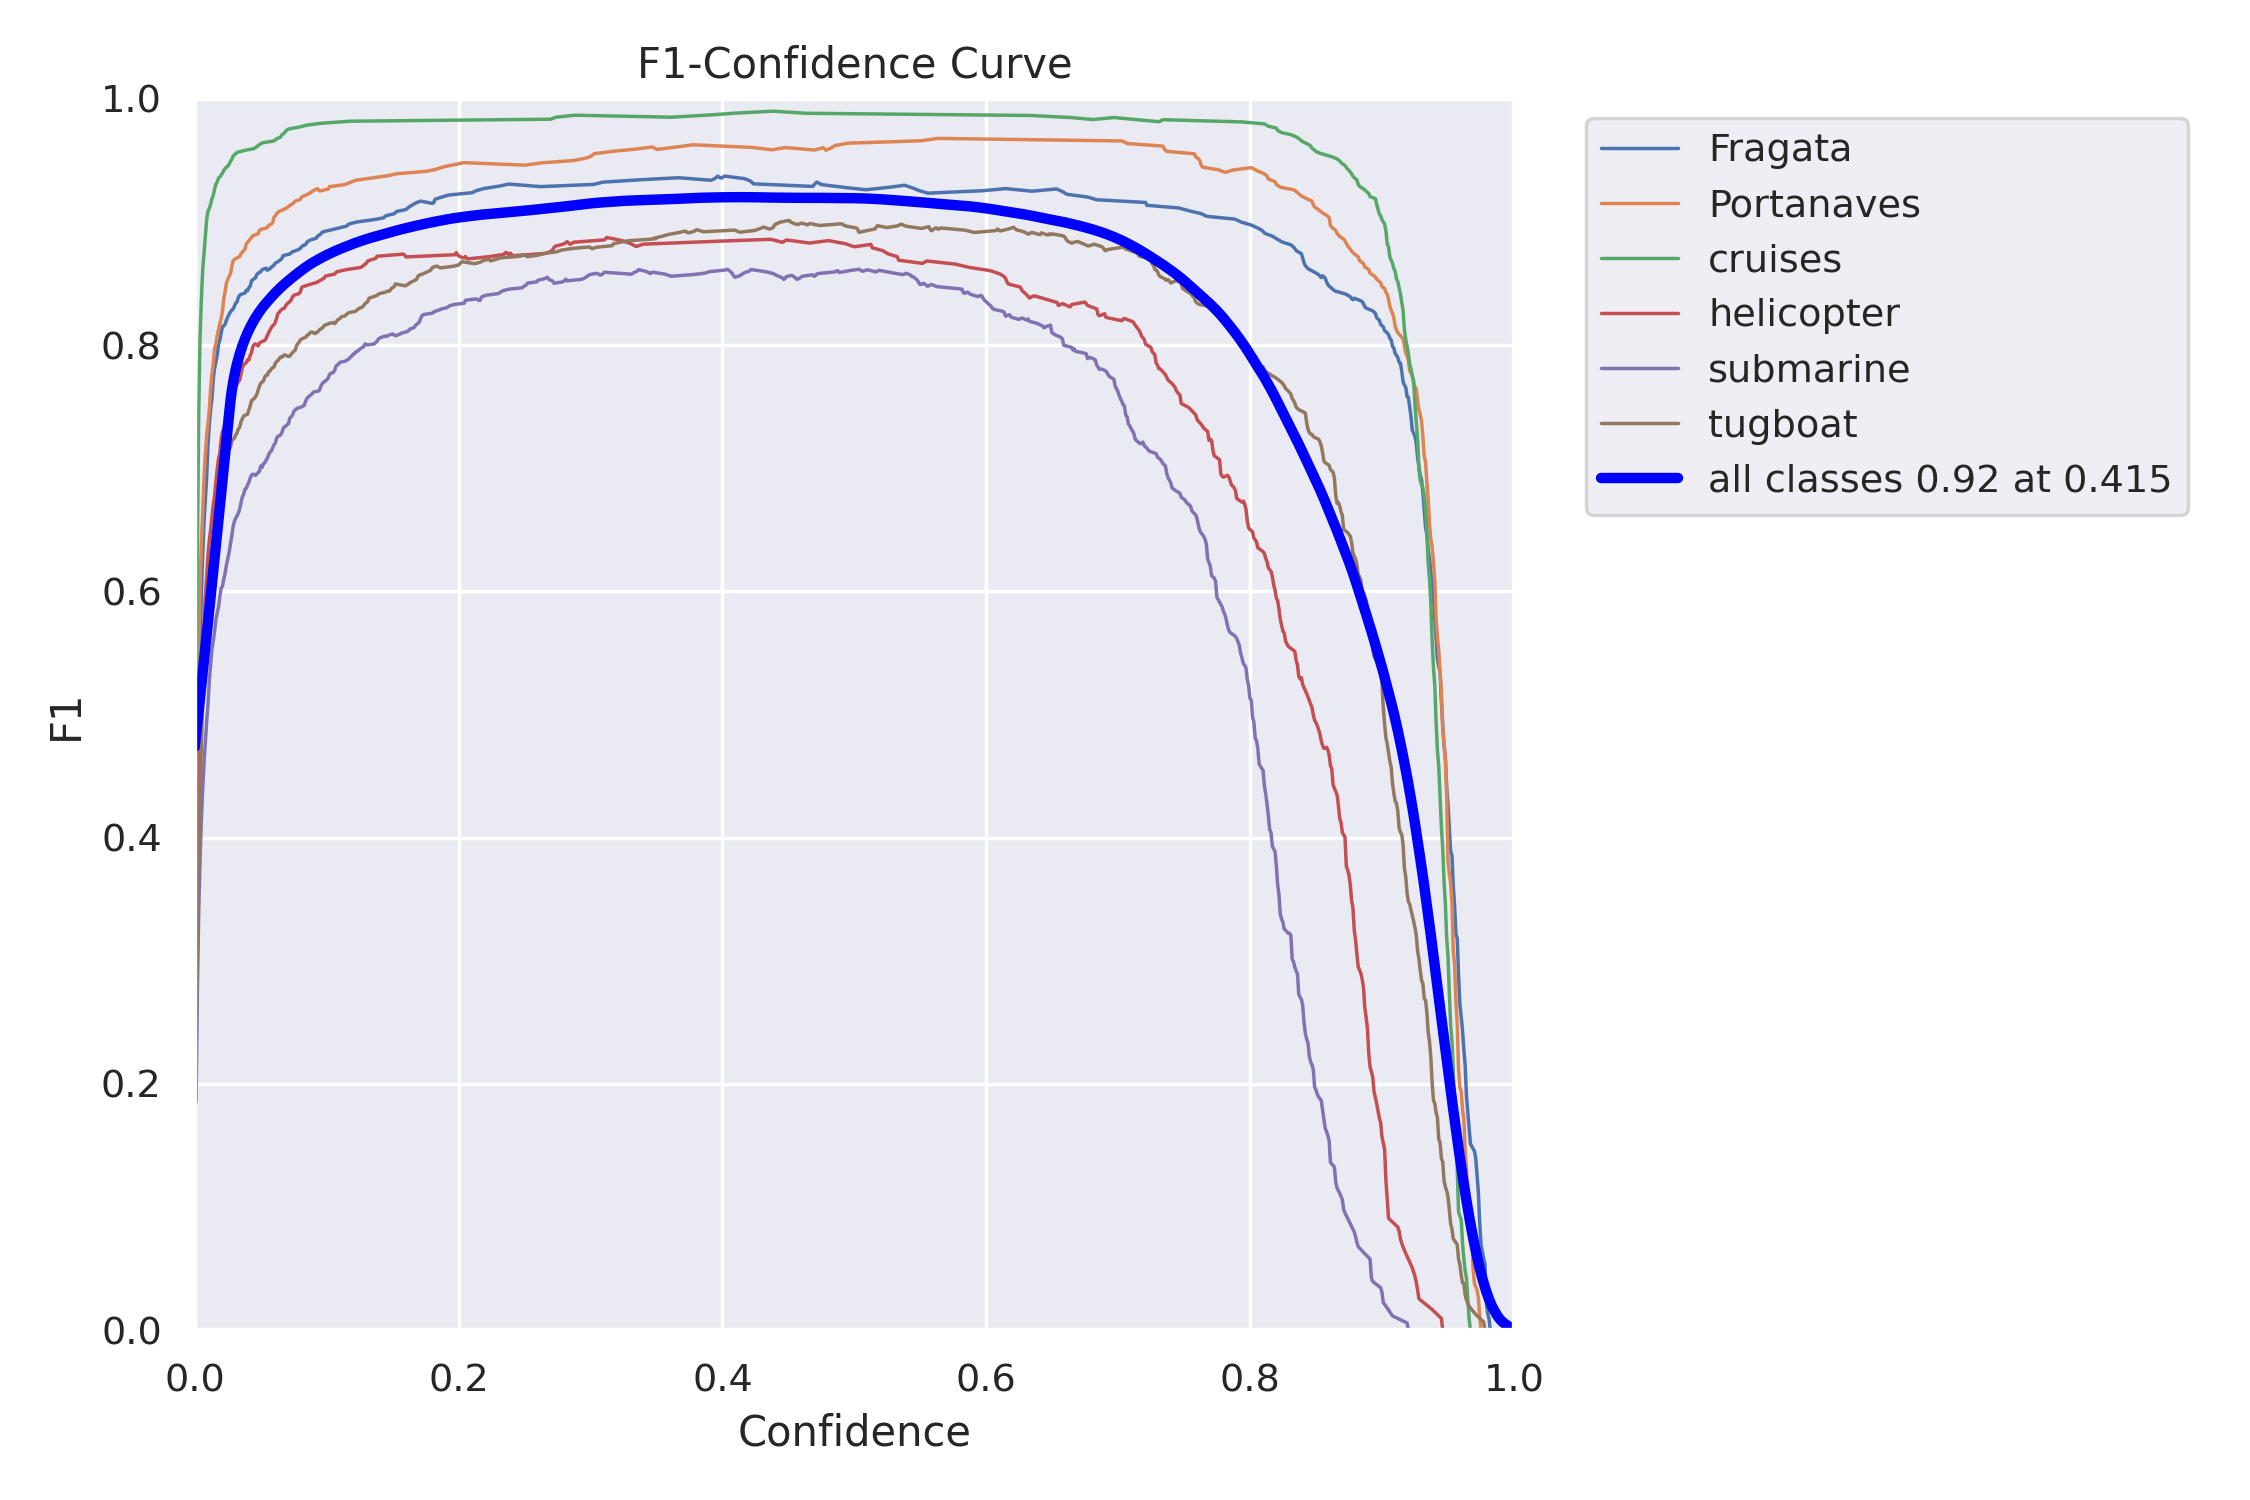

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


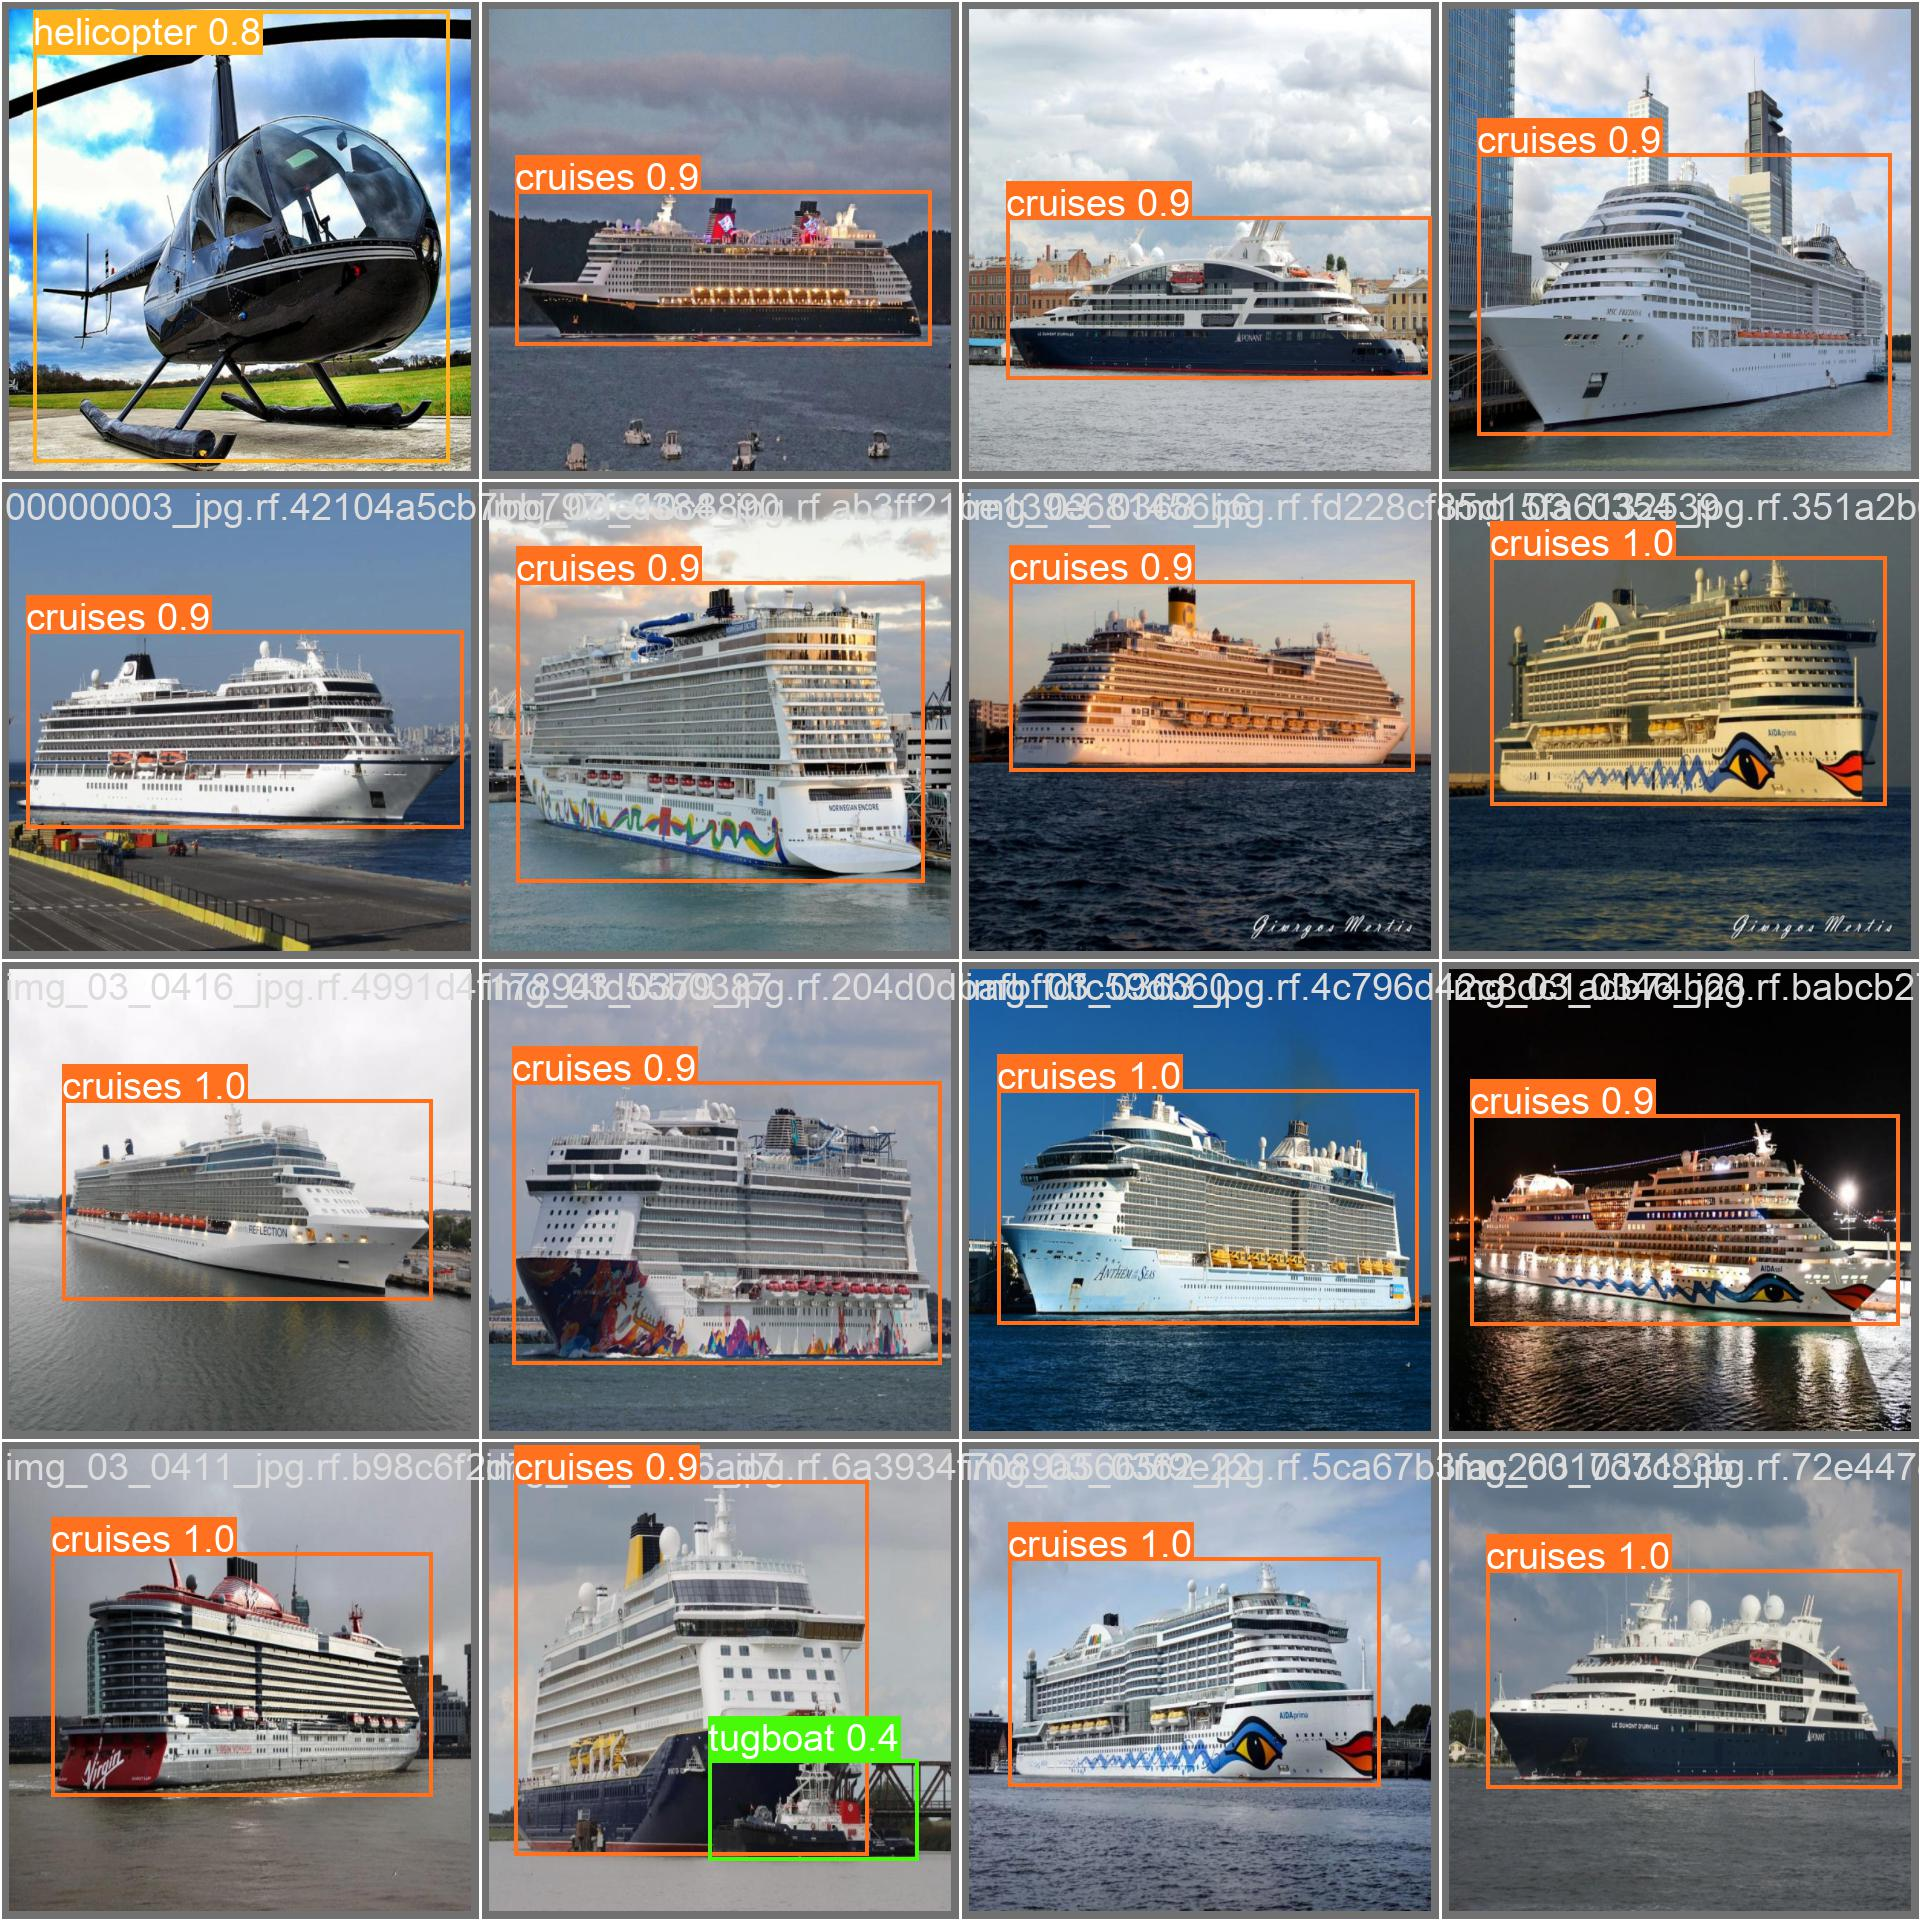

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## **Model Validation**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Capstone-NV-6/valid/labels.cache... 1611 images, 0 backgrounds, 0 corrupt: 100% 1611/1611 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 101/101 [01:49<00:00,  1.08s/it]
                   all       1611       1687       0.93      0.912      0.944      0.722
               Fragata       1611        256       0.94       0.92      0.951       0.81
            Portanaves       1611        254      0.962      0.957      0.984      0.832
               cruises       1611        299       0.99       0.99      0.994      0.897
            helicopter       1611        231      0.916      0.855      0.897      0.592
             submarine       1611        342      0.898      0.822      0.884      0.501
               tugboa

## **Inference Model with model v3**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
image 1/807 /content/datasets/Capstone-NV-6/test/images/00000013_jpg.rf.105c0deabe145c6222d99e4376dabe0d.jpg: 800x800 1 helicopter, 80.6ms
image 2/807 /content/datasets/Capstone-NV-6/test/images/00000030_jpg.rf.12c72571e1ad46f018beaa054b2e7b24.jpg: 800x800 2 helicopters, 67.9ms
image 3/807 /content/datasets/Capstone-NV-6/test/images/00000080_jpg.rf.bb7f701c1a632f4bef5b384a230ce8c5.jpg: 800x800 1 helicopter, 62.1ms
image 4/807 /content/datasets/Capstone-NV-6/test/images/00000088_jpg.rf.e7b5dcd357127aeb61fc762e56dcda70.jpg: 800x800 1 helicopter, 62.6ms
image 5/807 /content/datasets/Capstone-NV-6/test/images/00000094_png.rf.7d11aeeab7629296a13c8f6c12edbe7c.jpg: 800x800 1 helicopter, 61.7ms
image 6/807 /content/datasets/Capstone-NV-6/test/images/00000099_jpg.rf.73e6670c02a31b329a22de2bdea910ce.jpg: 800x800 1 helico

## **Save Model**

In [ ]:
!zip -r runs.zip /content/runs

from google.colab import files
files.download("/content/runs.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/img_03_0672_jpg.rf.362ee19f39bc5089de794ed906b4abe7.jpg (deflated 5%)
  adding: content/runs/detect/predict/img_02_1018_jpg.rf.9b61775ea3a0937999795b92f302546d.jpg (deflated 6%)
  adding: content/runs/detect/predict/img_01_0235_jpg.rf.e20e3b6ad7b38a5f9b134c7c8a4de972.jpg (deflated 7%)
  adding: content/runs/detect/predict/img_01_0847_jpg.rf.ea92313cf8f10608cbf63075c12fa83b.jpg (deflated 7%)
  adding: content/runs/detect/predict/00001133_jpg.rf.bb8469603843fc277c9ec1cc3d26aeac.jpg (deflated 4%)
  adding: content/runs/detect/predict/img_04_0978_jpg.rf.00f22ec78c864215fa52e2de02932d00.jpg (deflated 4%)
  adding: content/runs/detect/predict/img_03_1080_jpg.rf.3bba9bb96addc3549adde0ecf9214db1.jpg (deflated 6%)
  adding: content/runs/detect/predict/00000901_jpg.rf.804189aac6c04173ac2b460d2afc3933.jpg (deflated 5%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>